In [1]:
# Load the datasets with error handling for bad lines
import pandas as pd 
try:
    df = pd.read_csv('balanced_dataset.csv')
    print("Datasets loaded successfully.")
except Exception as e:
    print(f"Error loading CSV files: {e}")


Datasets loaded successfully.


In [2]:
print(df.head())

         ID Case Number             Date                   Block  IUCR  \
0   9920835    HY109637   1/10/2015 0:44  073XX N WINCHESTER AVE  1025   
1  10521835    HZ263903   5/14/2016 5:50         017XX W 95TH ST  1020   
2   9327080    HW470492   9/28/2013 1:30      020XX N OAKLEY AVE  1020   
3   9800727    HX450034  9/30/2014 18:41    052XX W FERDINAND ST  1090   
4   8485380    HV161701  2/17/2012 11:10  048XX W WRIGHTWOOD AVE  1020   

  Primary Type    Description    Location Description  Arrest  Domestic  ...  \
0        ARSON     AGGRAVATED               APARTMENT    True     False  ...   
1        ARSON        BY FIRE               RESIDENCE   False      True  ...   
2        ARSON        BY FIRE  VEHICLE NON-COMMERCIAL   False     False  ...   
3        ARSON  ATTEMPT ARSON               RESIDENCE   False      True  ...   
4        ARSON        BY FIRE  VEHICLE NON-COMMERCIAL   False     False  ...   

   Ward  Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0  4

In [3]:
print("First few rows before renaming columns:")
print(df.head())
print("Columns before renaming:")
print(df.columns.tolist())

First few rows before renaming columns:
         ID Case Number             Date                   Block  IUCR  \
0   9920835    HY109637   1/10/2015 0:44  073XX N WINCHESTER AVE  1025   
1  10521835    HZ263903   5/14/2016 5:50         017XX W 95TH ST  1020   
2   9327080    HW470492   9/28/2013 1:30      020XX N OAKLEY AVE  1020   
3   9800727    HX450034  9/30/2014 18:41    052XX W FERDINAND ST  1090   
4   8485380    HV161701  2/17/2012 11:10  048XX W WRIGHTWOOD AVE  1020   

  Primary Type    Description    Location Description  Arrest  Domestic  ...  \
0        ARSON     AGGRAVATED               APARTMENT    True     False  ...   
1        ARSON        BY FIRE               RESIDENCE   False      True  ...   
2        ARSON        BY FIRE  VEHICLE NON-COMMERCIAL   False     False  ...   
3        ARSON  ATTEMPT ARSON               RESIDENCE   False      True  ...   
4        ARSON        BY FIRE  VEHICLE NON-COMMERCIAL   False     False  ...   

   Ward  Community Area  FBI Code 

In [4]:
# List of columns to drop
columns_to_drop = ['ID', 'Case Number', 'Block', 'IUCR', 'Description', 
                   'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Location']


In [5]:
# Drop the unnecessary columns
try:
    df = df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' will handle cases where columns are missing
    print("Unnecessary columns dropped successfully.")
except Exception as e:
    print(f"Error dropping columns: {e}")
    raise

Unnecessary columns dropped successfully.


In [6]:
# Inspect the cleaned data
print("First few rows after cleaning:")
print(df.head())
print("Remaining columns after cleaning:")
print(df.columns.tolist())

First few rows after cleaning:
              Date Primary Type    Location Description  Arrest  Domestic  \
0   1/10/2015 0:44        ARSON               APARTMENT    True     False   
1   5/14/2016 5:50        ARSON               RESIDENCE   False      True   
2   9/28/2013 1:30        ARSON  VEHICLE NON-COMMERCIAL   False     False   
3  9/30/2014 18:41        ARSON               RESIDENCE   False      True   
4  2/17/2012 11:10        ARSON  VEHICLE NON-COMMERCIAL   False     False   

   Beat  District  Ward  Community Area  Year   Latitude  Longitude  
0  2424      24.0  49.0             1.0  2015  42.015517 -87.679075  
1  2213      22.0  19.0            72.0  2016  41.721154 -87.666938  
2  1432      14.0  32.0            22.0  2013  41.918919 -87.684997  
3  1523      15.0  28.0            25.0  2014  41.888935 -87.756292  
4  2521      25.0  31.0            19.0  2012  41.927896 -87.747367  
Remaining columns after cleaning:
['Date', 'Primary Type', 'Location Description', 'Ar

In [7]:
# Check the cleaned DataFrame
print(df.head())

              Date Primary Type    Location Description  Arrest  Domestic  \
0   1/10/2015 0:44        ARSON               APARTMENT    True     False   
1   5/14/2016 5:50        ARSON               RESIDENCE   False      True   
2   9/28/2013 1:30        ARSON  VEHICLE NON-COMMERCIAL   False     False   
3  9/30/2014 18:41        ARSON               RESIDENCE   False      True   
4  2/17/2012 11:10        ARSON  VEHICLE NON-COMMERCIAL   False     False   

   Beat  District  Ward  Community Area  Year   Latitude  Longitude  
0  2424      24.0  49.0             1.0  2015  42.015517 -87.679075  
1  2213      22.0  19.0            72.0  2016  41.721154 -87.666938  
2  1432      14.0  32.0            22.0  2013  41.918919 -87.684997  
3  1523      15.0  28.0            25.0  2014  41.888935 -87.756292  
4  2521      25.0  31.0            19.0  2012  41.927896 -87.747367  


In [8]:
# Check for null values
null_counts = df.isnull().sum()
missing_percentage = (null_counts / len(df)) * 100

print("Null values in each column:\n", null_counts)
print("\nPercentage of missing values in each column:\n", missing_percentage)

Null values in each column:
 Date                      0
Primary Type              0
Location Description      2
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
Year                      0
Latitude                219
Longitude               219
dtype: int64

Percentage of missing values in each column:
 Date                    0.000000
Primary Type            0.000000
Location Description    0.009524
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000000
Ward                    0.000000
Community Area          0.000000
Year                    0.000000
Latitude                1.042857
Longitude               1.042857
dtype: float64


In [9]:
# Decide on action based on missing values
# For numerical columns, fill with mean or median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if null_counts[col] > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if null_counts[col] > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)



In [10]:
# Remove rows with remaining missing values if any
df.dropna(inplace=True)



In [11]:
null_counts = df.isnull().sum()
missing_percentage = (null_counts / len(df)) * 100

print("Null values in each column:\n", null_counts)
print("\nPercentage of missing values in each column:\n", missing_percentage)

Null values in each column:
 Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
Latitude                0
Longitude               0
dtype: int64

Percentage of missing values in each column:
 Date                    0.0
Primary Type            0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
Year                    0.0
Latitude                0.0
Longitude               0.0
dtype: float64


In [12]:
# Define columns to check for outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['Beat', 'District', 'Ward', 'Community Area', 'Year', 'Latitude',
       'Longitude'],
      dtype='object')


In [13]:
import pandas as pd

# Define columns to check for outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# IQR method to detect and remove outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
from sklearn.preprocessing import StandardScaler



# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
# Check memory usage
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 20921 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  20921 non-null  object 
 1   Primary Type          20921 non-null  object 
 2   Location Description  20921 non-null  object 
 3   Arrest                20921 non-null  bool   
 4   Domestic              20921 non-null  bool   
 5   Beat                  20921 non-null  float64
 6   District              20921 non-null  float64
 7   Ward                  20921 non-null  float64
 8   Community Area        20921 non-null  float64
 9   Year                  20921 non-null  float64
 10  Latitude              20921 non-null  float64
 11  Longitude             20921 non-null  float64
dtypes: bool(2), float64(7), object(3)
memory usage: 5.5 MB
None


In [17]:
df['Primary Type'] = df['Primary Type'].astype('category')
df['Location Description'] = df['Location Description'].astype('category')


In [18]:
df['Arrest'] = df['Arrest'].astype('bool')
df['Domestic'] = df['Domestic'].astype('bool')


In [19]:
df['Beat'] = pd.to_numeric(df['Beat'], downcast='float')
df['District'] = pd.to_numeric(df['District'], downcast='float')
df['Ward'] = pd.to_numeric(df['Ward'], downcast='float')
df['Community Area'] = pd.to_numeric(df['Community Area'], downcast='float')
df['Year'] = pd.to_numeric(df['Year'], downcast='float')
df['Latitude'] = pd.to_numeric(df['Latitude'], downcast='float')
df['Longitude'] = pd.to_numeric(df['Longitude'], downcast='float')


In [20]:
df['Date'] = pd.to_datetime(df['Date'])


In [21]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20921 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  20921 non-null  datetime64[ns]
 1   Primary Type          20921 non-null  category      
 2   Location Description  20921 non-null  category      
 3   Arrest                20921 non-null  bool          
 4   Domestic              20921 non-null  bool          
 5   Beat                  20921 non-null  float32       
 6   District              20921 non-null  float32       
 7   Ward                  20921 non-null  float32       
 8   Community Area        20921 non-null  float32       
 9   Year                  20921 non-null  float32       
 10  Latitude              20921 non-null  float32       
 11  Longitude             20921 non-null  float32       
dtypes: bool(2), category(2), datetime64[ns](1), float32(7)
memory usage: 984.1 KB
N

In [22]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns

# Print unique values count for each categorical column
for col in categorical_cols:
    print(f'{col}: {df[col].nunique()} unique values')

Primary Type: 21 unique values
Location Description: 85 unique values


In [23]:
df = df.drop(columns=['Location Description'])

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=['Date'])

In [25]:
df['Arrest'] = df['Arrest'].astype(int)
df['Domestic'] = df['Domestic'].astype(int)


In [26]:
df.to_csv('cleaned_data.csv', index=False)

In [27]:
import pandas as pd

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Define the mapping for 'Primary Type'
primary_type_mapping = {
    'ARSON': 0,
    'ASSAULT': 1,
    'BATTERY': 2,
    'BURGLARY': 3,
    'CRIM SEXUAL ASSAULT': 4,
    'CRIMINAL DAMAGE': 5,
    'CRIMINAL TRESPASS': 6,
    'DECEPTIVE PRACTICE': 7,
    'GAMBLING': 8,
    'INTERFERENCE WITH PUBLIC OFFICER': 9,
    'LIQUOR LAW VIOLATION': 10,
    'MOTOR VEHICLE THEFT': 11,
    'NARCOTICS': 12,
    'OFFENSE INVOLVING CHILDREN': 13,
    'OTHER OFFENSE': 14,
    'PROSTITUTION': 15,
    'PUBLIC PEACE VIOLATION': 16,
    'ROBBERY': 17,
    'SEX OFFENSE': 18,
    'THEFT': 19,
    'WEAPONS VIOLATION': 20
}

# Apply the mapping to the 'Primary Type' column
df['Primary Type'] = df['Primary Type'].map(primary_type_mapping)

# Display the first few rows to verify changes
print(df.head())

# Save the processed DataFrame to a new CSV file
df.to_csv('final_dataset.csv', index=False)


   Primary Type  Arrest  Domestic      Beat  District      Ward  \
0             0       1         0  1.883195  1.888086  2.024714   
1             0       0         1  1.572515  1.593055 -0.263653   
2             0       0         0  0.422555  0.412934  0.727973   
3             0       0         1  0.556545  0.560449  0.422857   
4             0       0         0  2.026020  2.035601  0.651694   

   Community Area  Year  Latitude  Longitude  Month  Day  DayOfWeek  
0       -1.759151  2015  2.115631  -0.105294      1   10          5  
1        1.592046  2016 -1.380728   0.105451      5   14          5  
2       -0.767952  2013  0.968268  -0.208125      9   28          5  
3       -0.626352  2014  0.612120  -1.446040      9   30          1  
4       -0.909552  2012  1.074891  -1.291083      2   17          4  


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# List the very important crime types
important_crime_types = [
    'PROSTITUTION', 
    'ASSAULT', 
    'ROBBERY', 
    'THEFT', 
    'CRIM SEXUAL ASSAULT', 
    'CRIMINAL DAMAGE'
]

# Create a mapping dictionary for the very important crime types
mapping = {crime_type: index for index, crime_type in enumerate(important_crime_types)}

# Add a default mapping for other categories
mapping['Other'] = 6

# Apply the mapping to the 'Primary Type' column
df['Primary Type'] = df['Primary Type'].apply(lambda x: mapping.get(x, 6))

# Display the first few rows to verify changes
print(df.head())

# Save the processed DataFrame to a new CSV file
df.to_csv('final_dataset.csv', index=False)


In [30]:
import numpy as np 
print(np.unique(df['Primary Type'])) 


[0 1 2 3 4 5 6]


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('final_dataset.csv')


In [29]:
# Show basic statistics
print(df.describe())
print(df.info())


       Primary Type        Arrest      Domestic          Beat      District  \
count  20921.000000  20921.000000  20921.000000  20921.000000  20921.000000   
mean       9.999092      0.437742      0.103293      0.000016      0.000017   
std        6.058364      0.496121      0.304349      1.000066      1.000066   
min        0.000000      0.000000      0.000000     -1.522513     -1.504763   
25%        5.000000      0.000000      0.000000     -0.771578     -0.767187   
50%       10.000000      0.000000      0.000000     -0.181138     -0.177127   
75%       15.000000      1.000000      0.000000      0.703787      0.707964   
max       20.000000      1.000000      1.000000      2.046634      2.035601   

               Ward  Community Area          Year      Latitude     Longitude  \
count  20921.000000    20921.000000  20921.000000  20921.000000  20921.000000   
mean       0.000105       -0.000033   2013.229100      0.000012      0.000013   
std        1.000004        1.000034      1.08

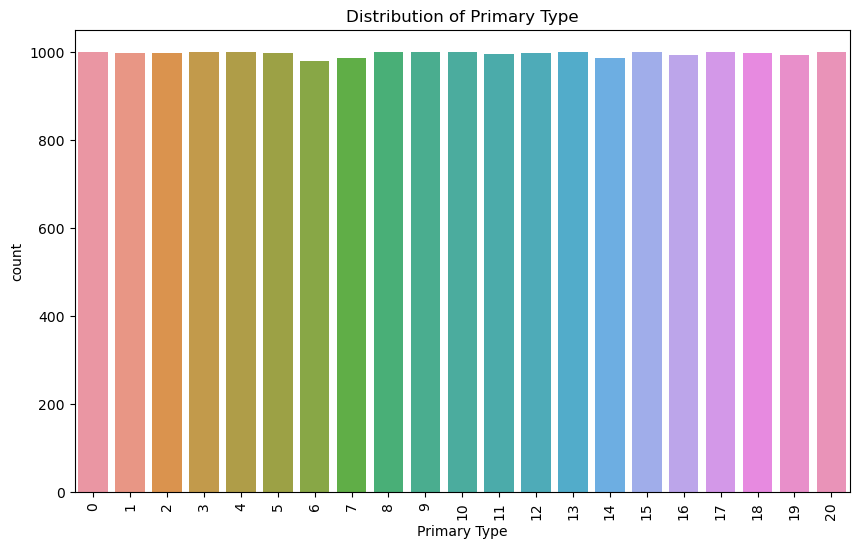

In [30]:
# Distribution of Primary Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Primary Type')
plt.xticks(rotation=90)
plt.title('Distribution of Primary Type')
plt.show()


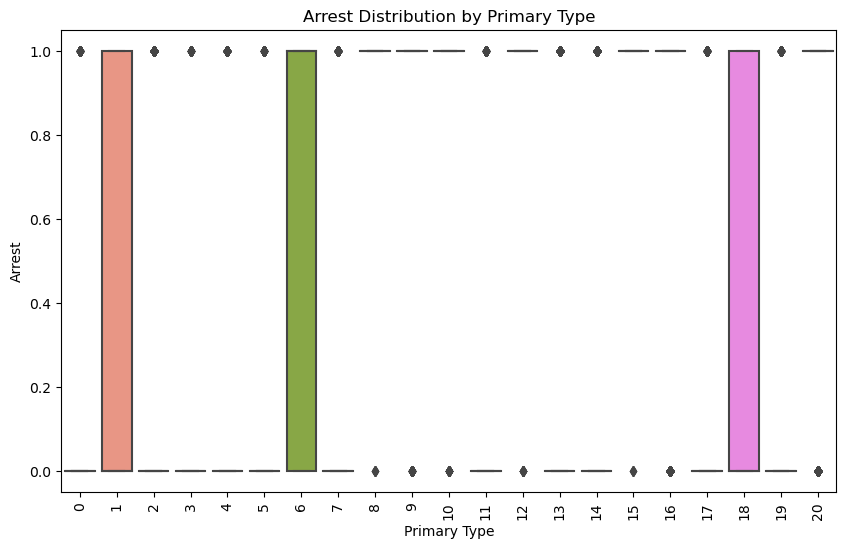

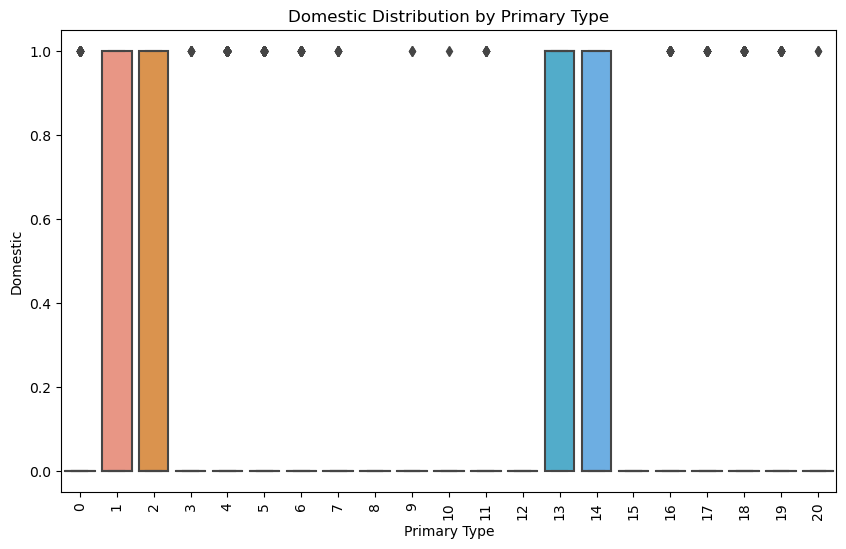

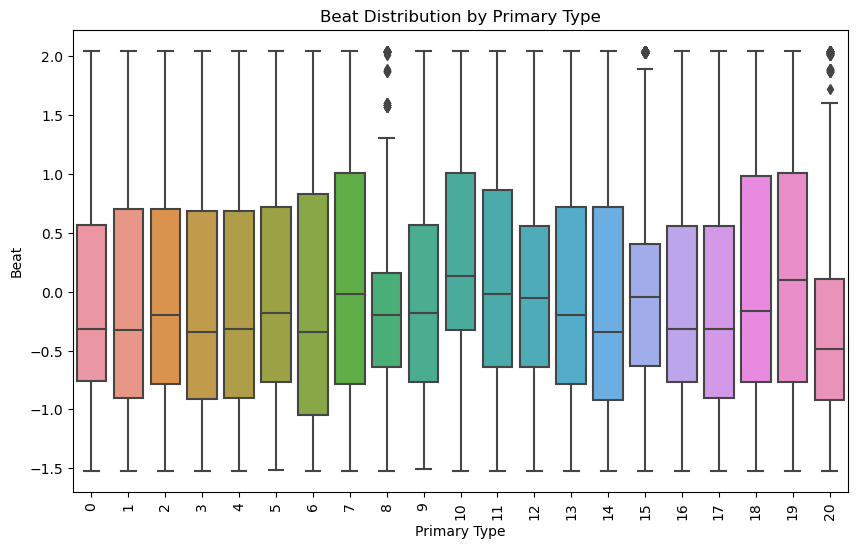

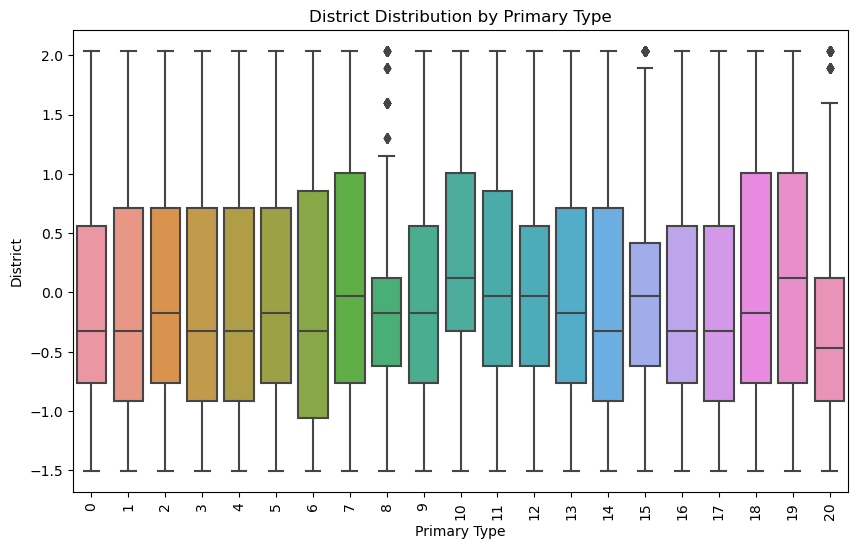

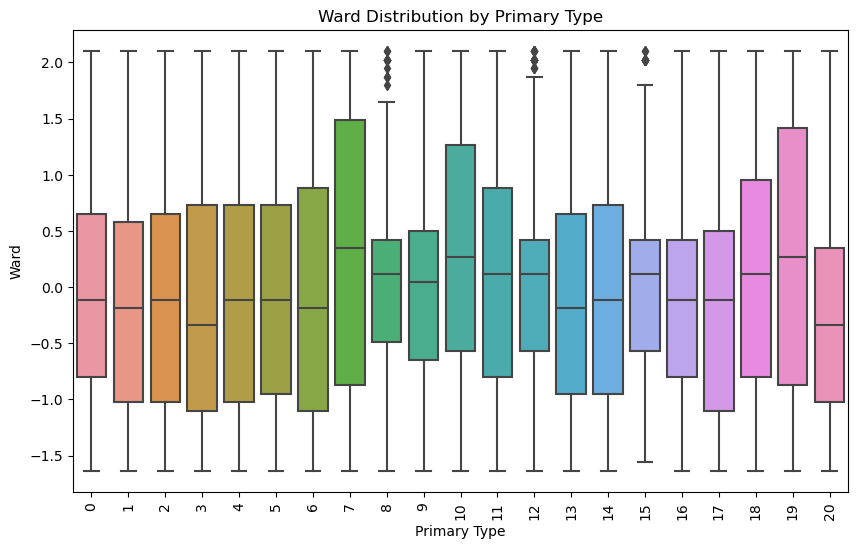

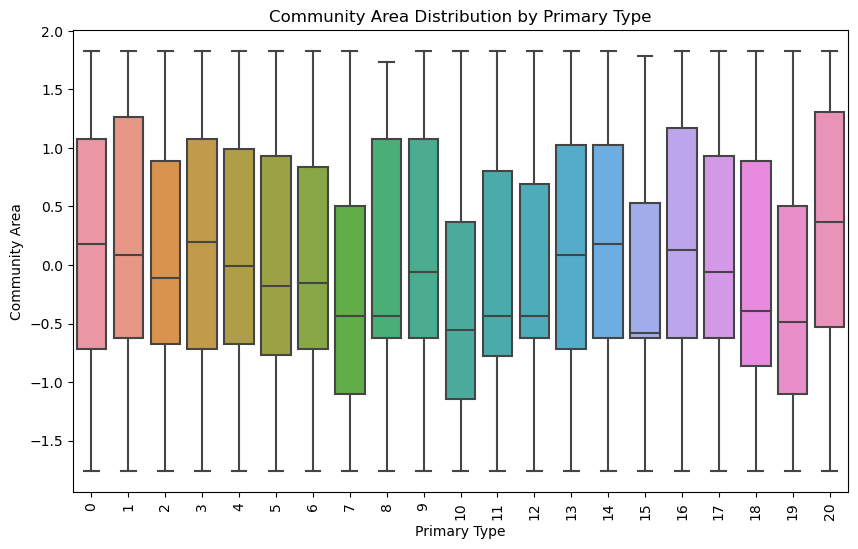

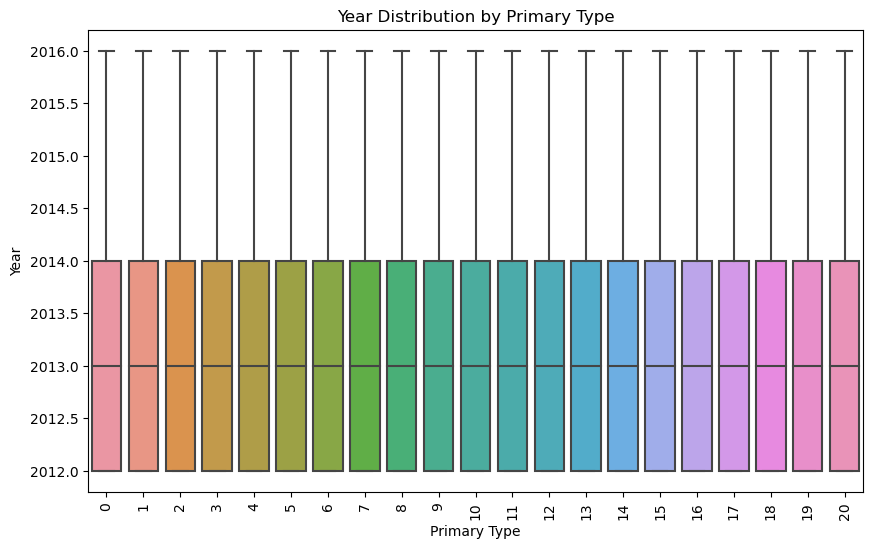

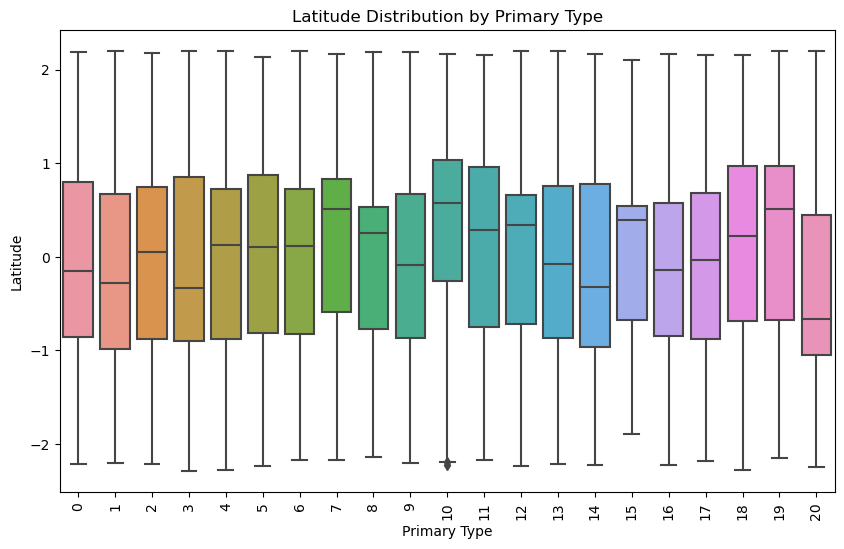

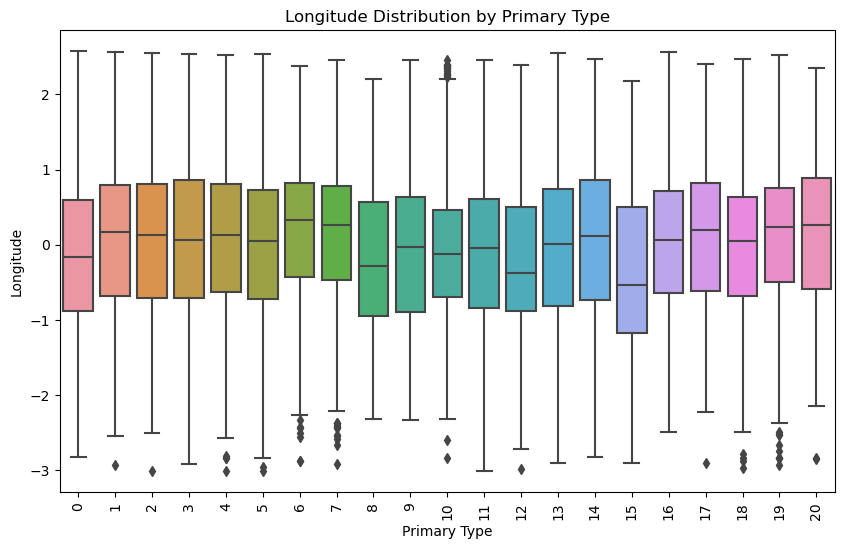

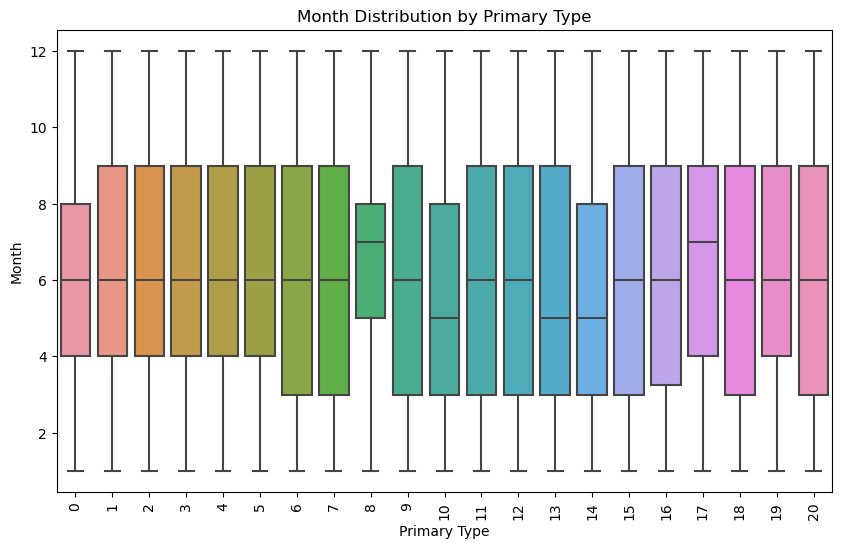

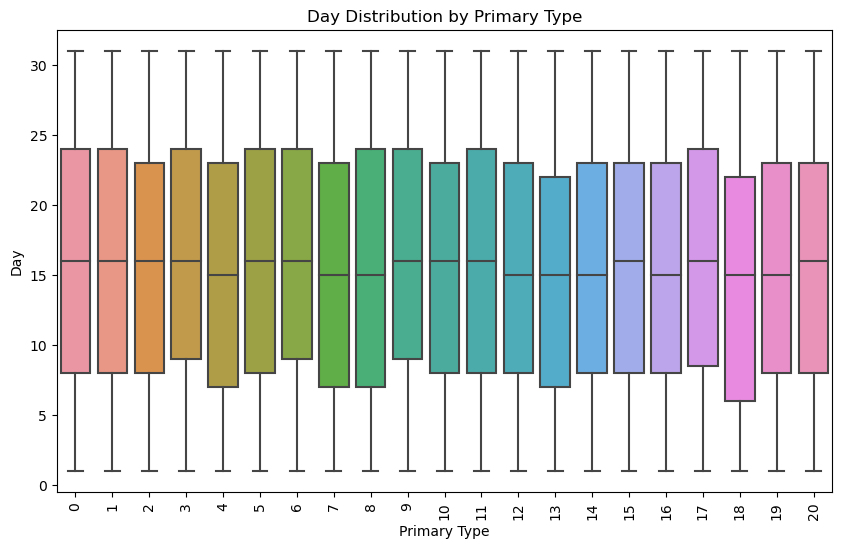

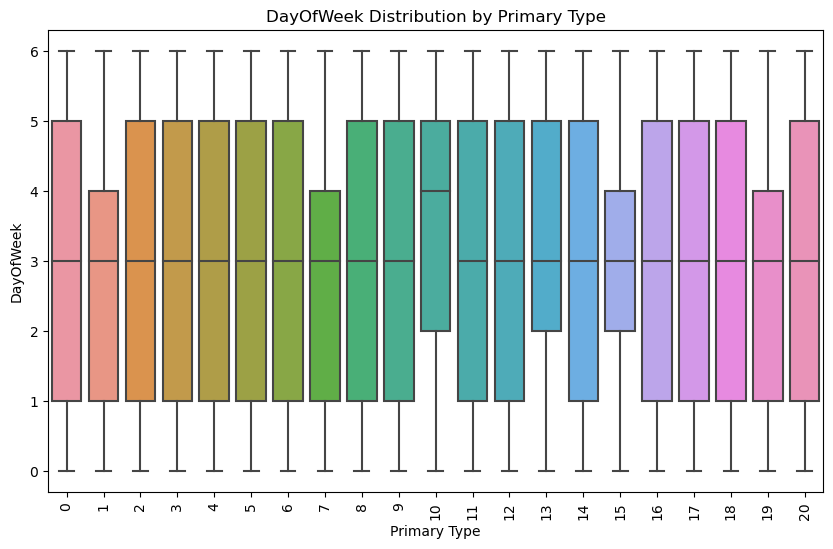

In [31]:
# Feature list (excluding target variable)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Plot numerical features against Primary Type
for feature in numerical_features:
    if feature != 'Primary Type':  # Skip target variable
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='Primary Type', y=feature)
        plt.xticks(rotation=90)
        plt.title(f'{feature} Distribution by Primary Type')
        plt.show()


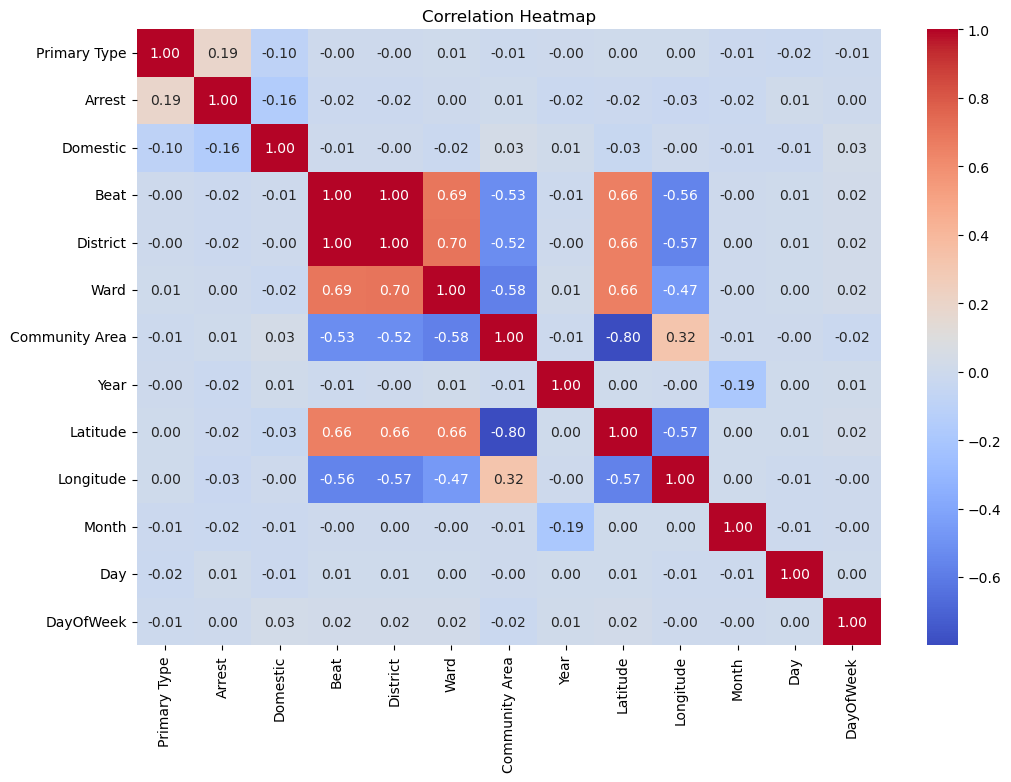

In [32]:
# Calculate correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


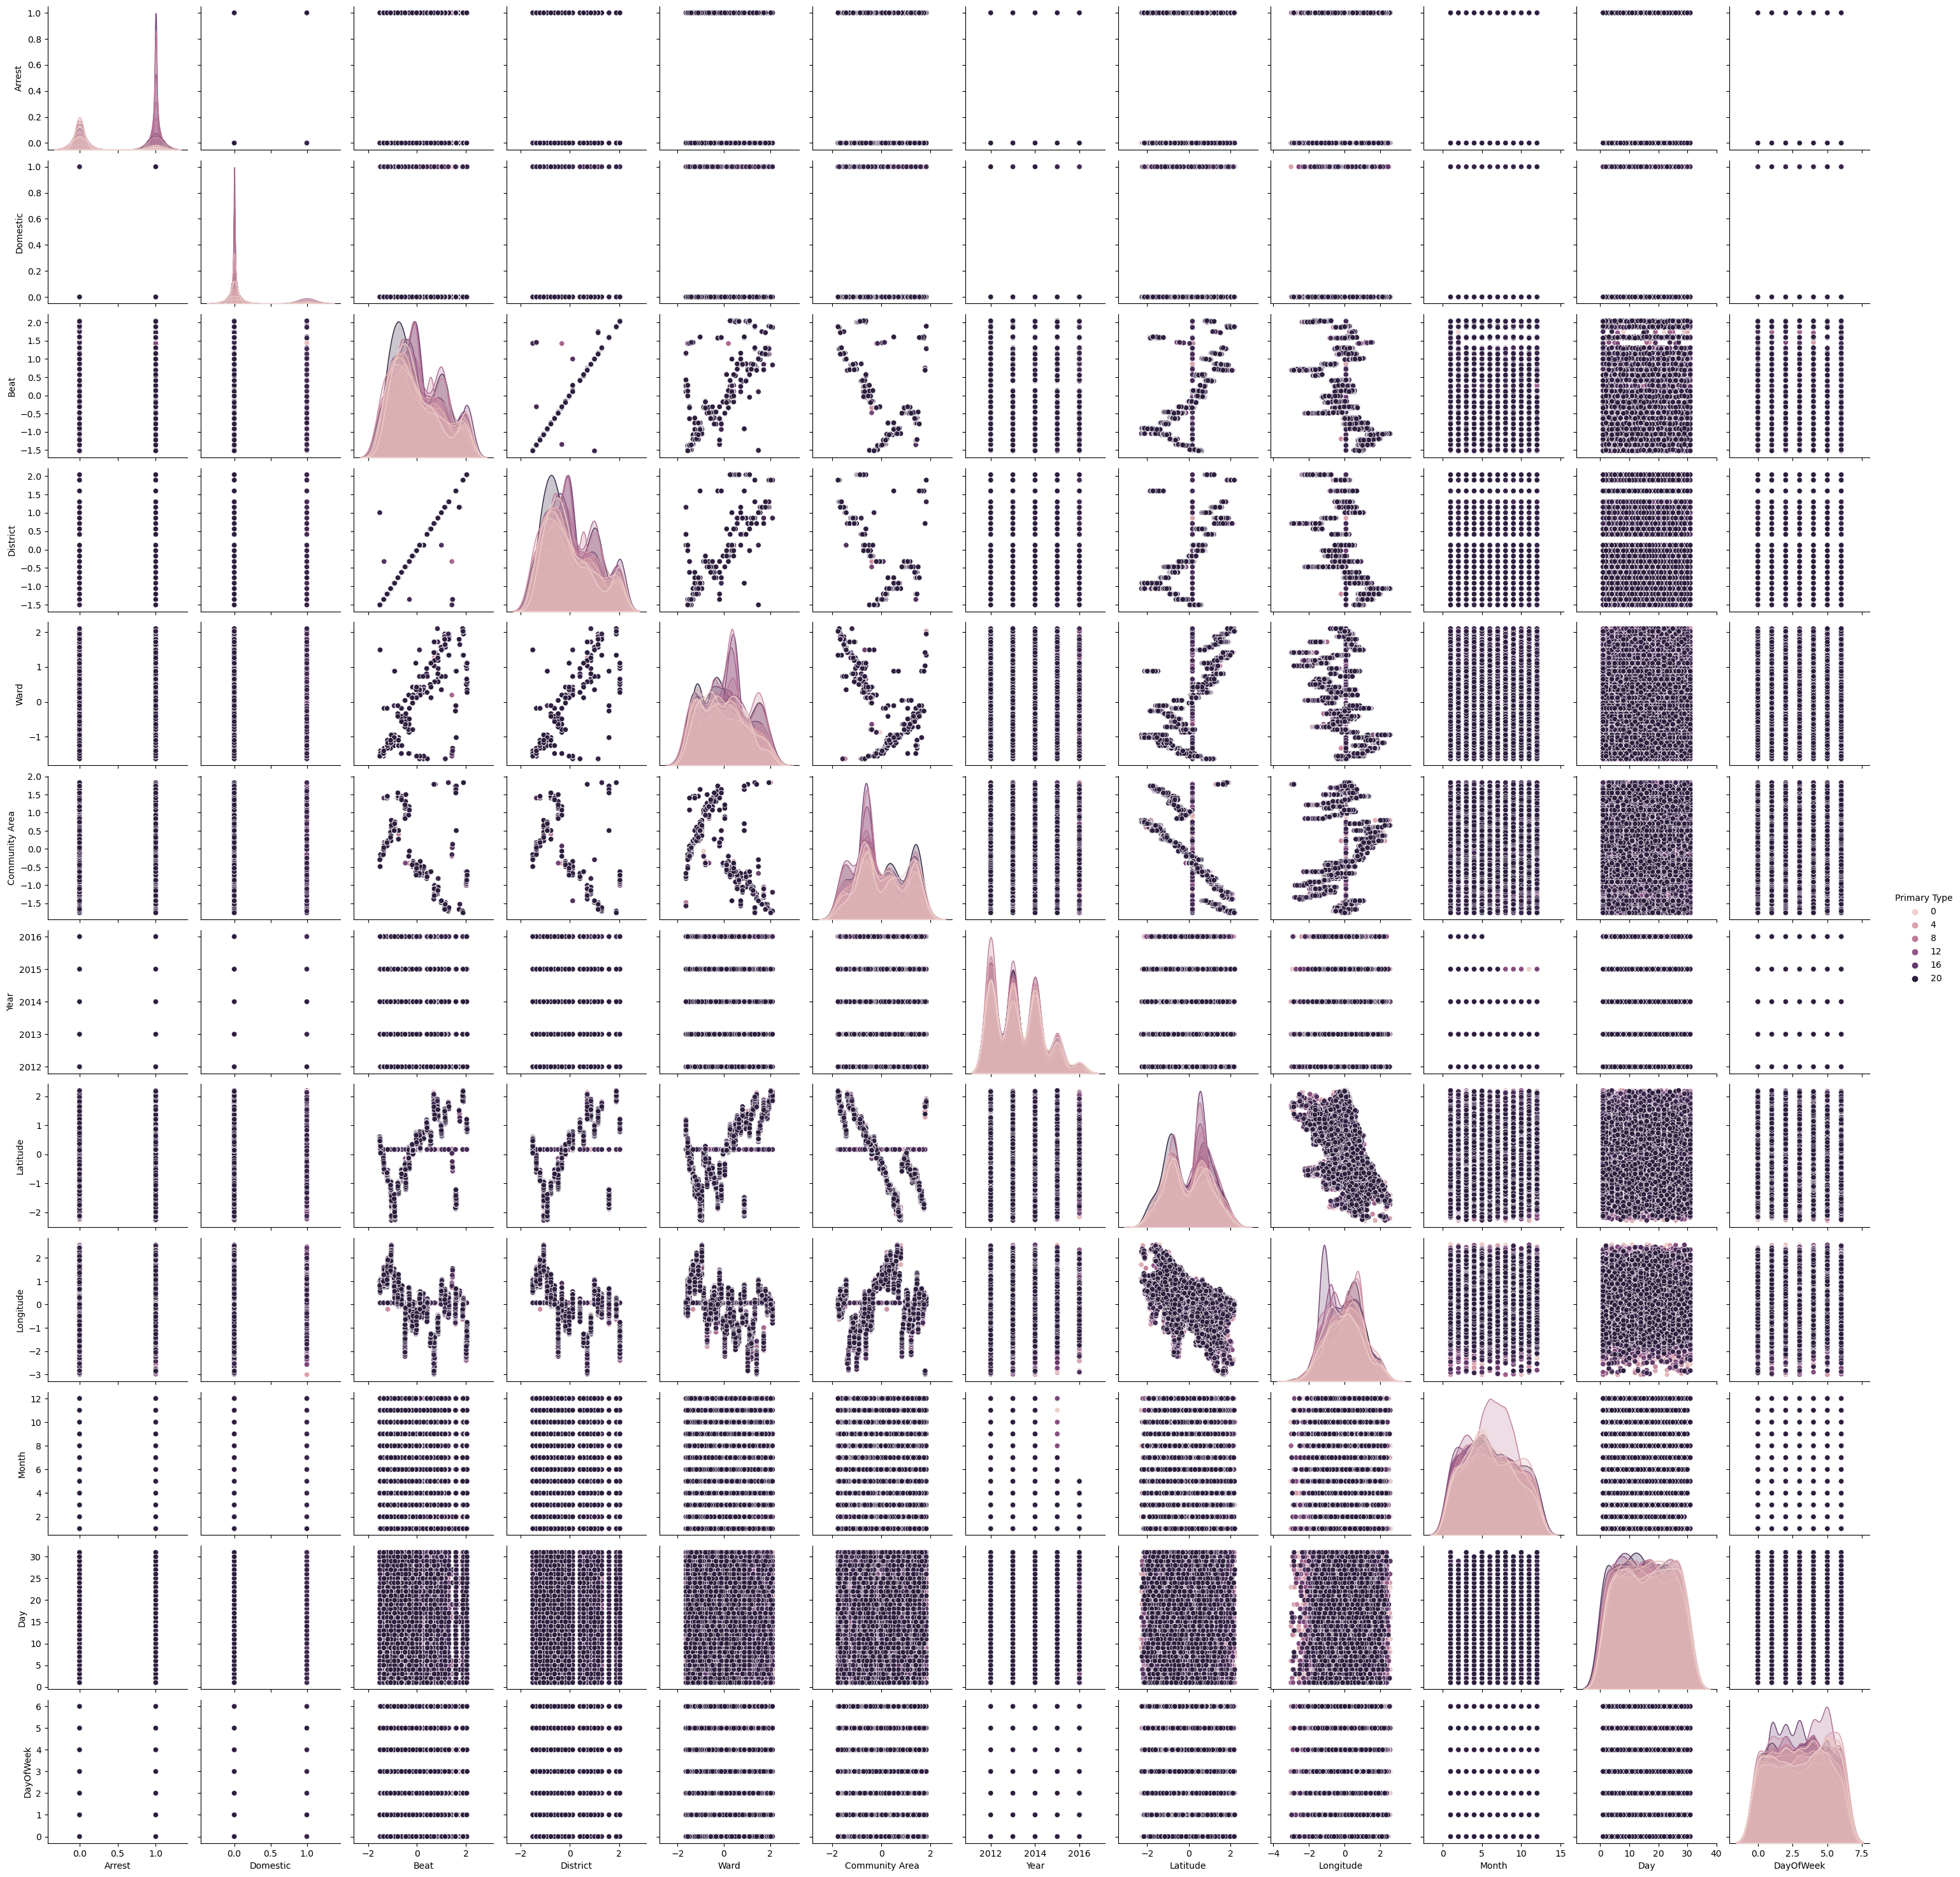

In [33]:
# Pairplot for numerical features
sns.pairplot(df, hue='Primary Type', diag_kind='kde')
plt.show()


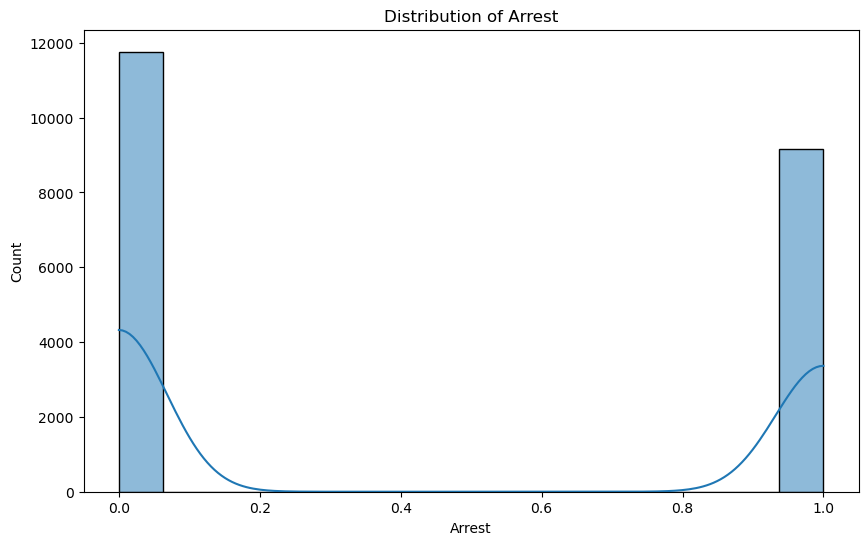

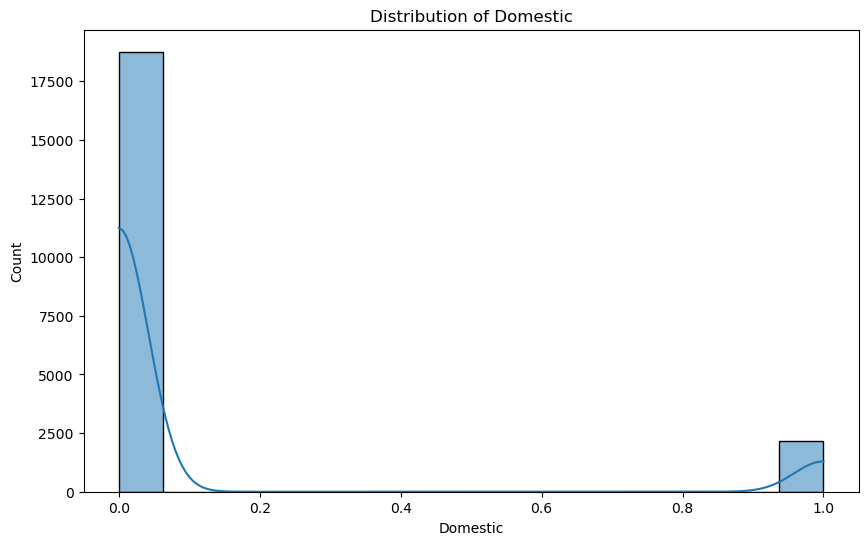

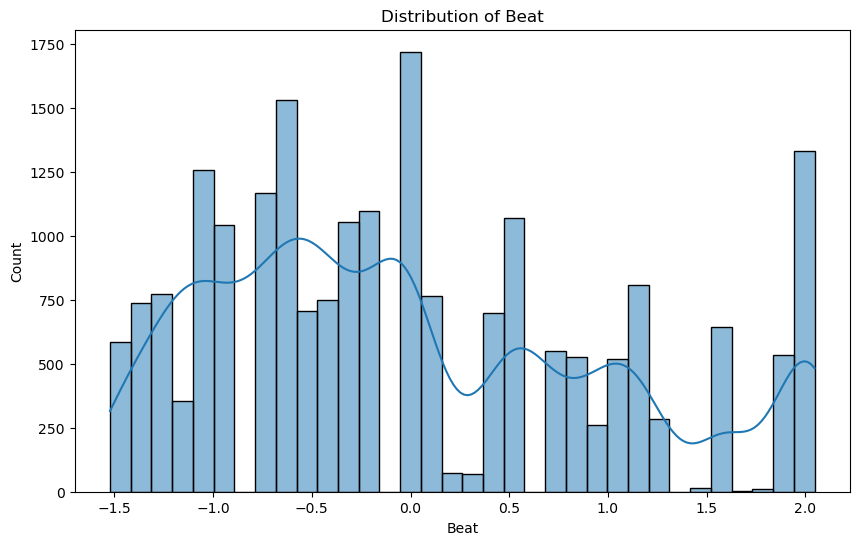

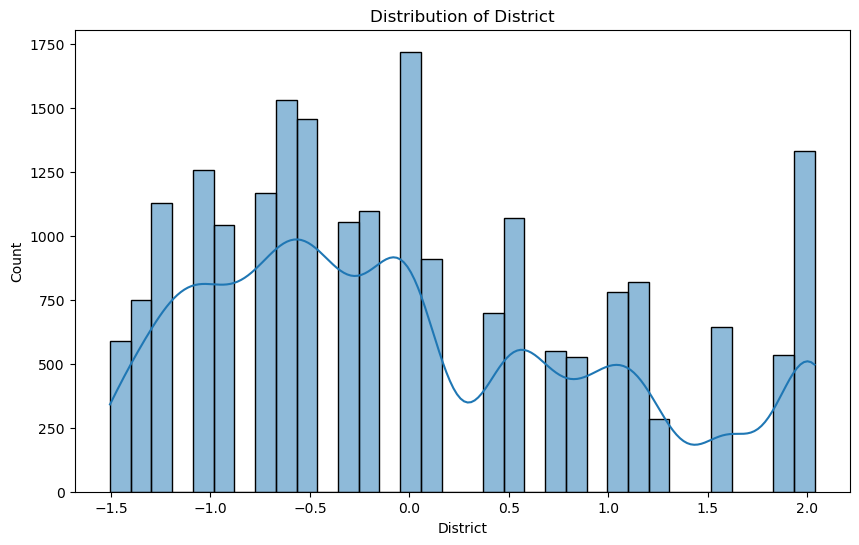

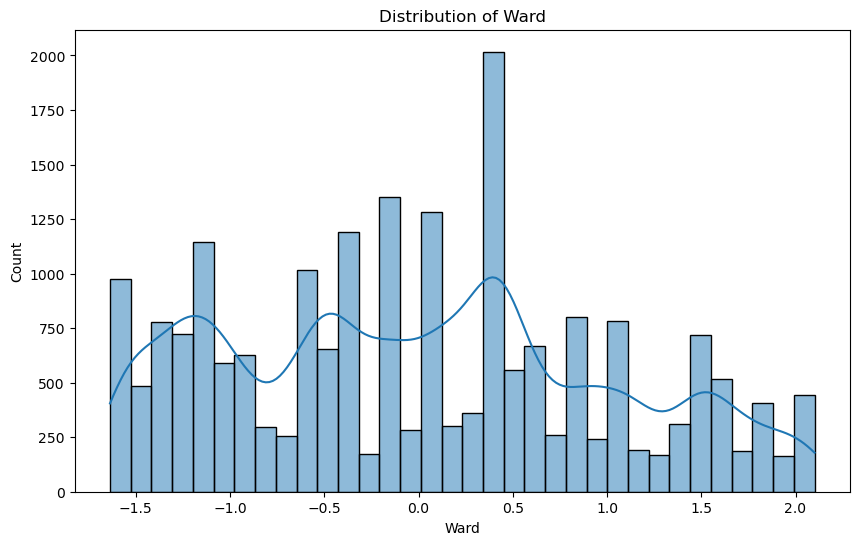

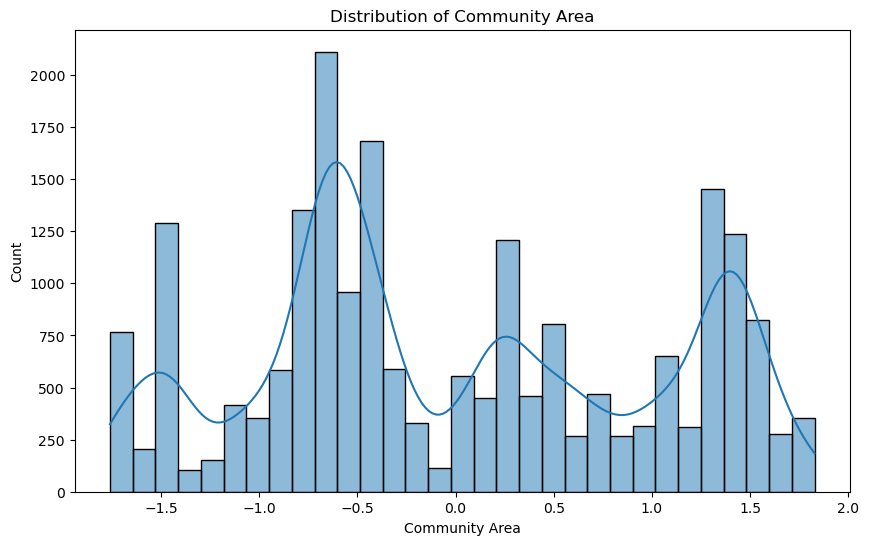

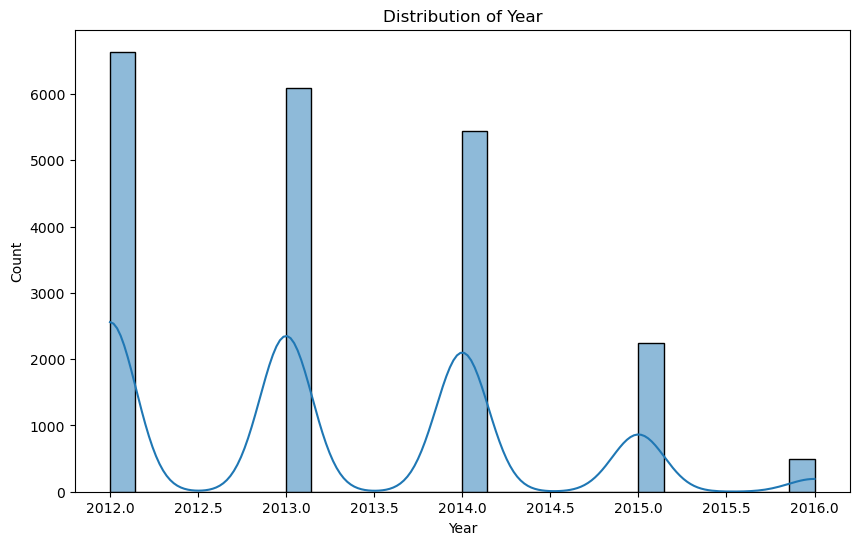

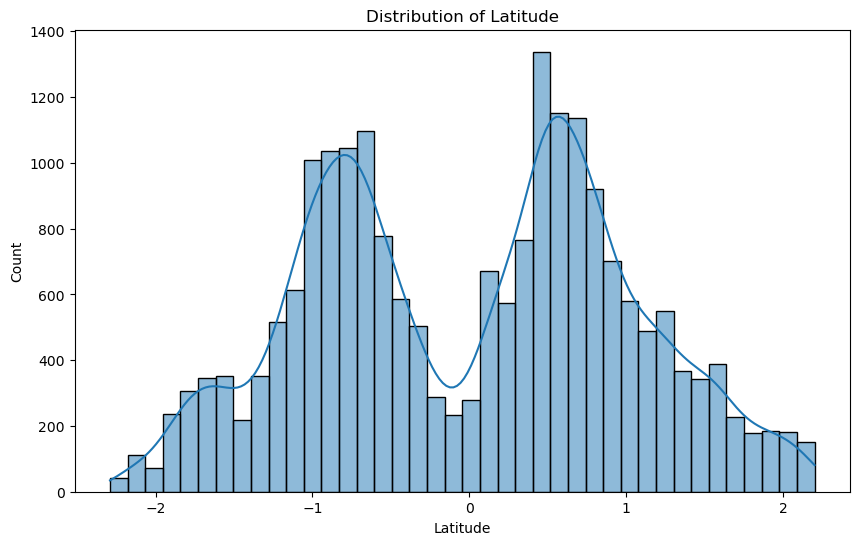

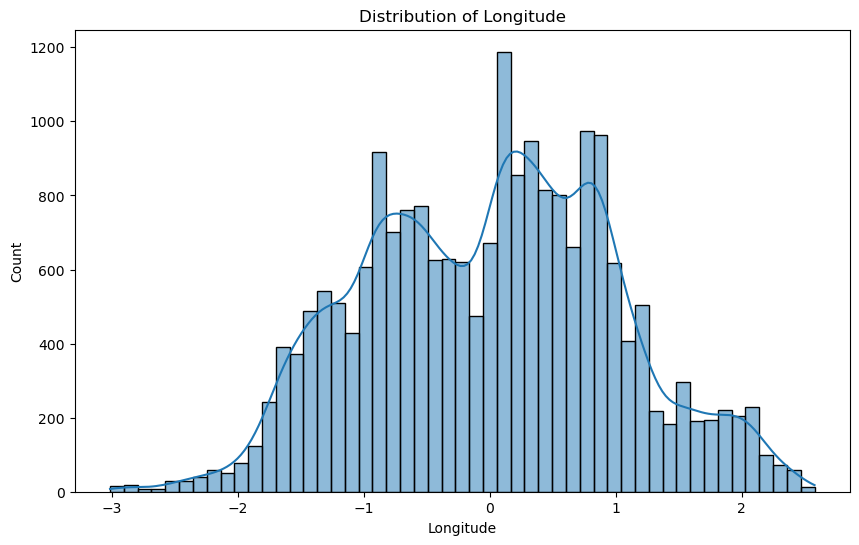

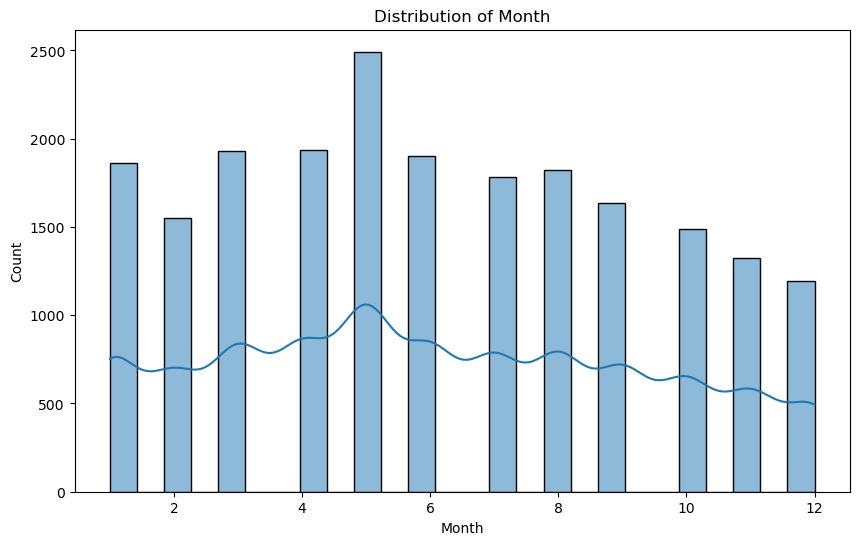

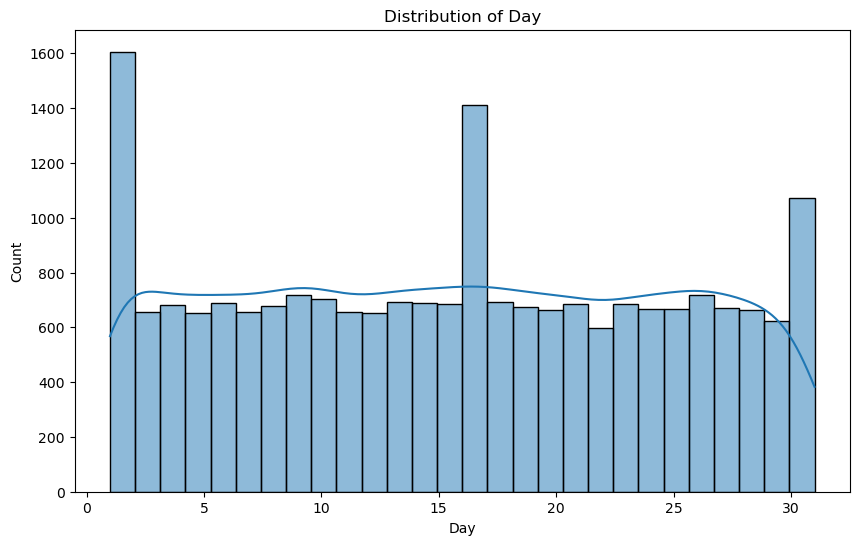

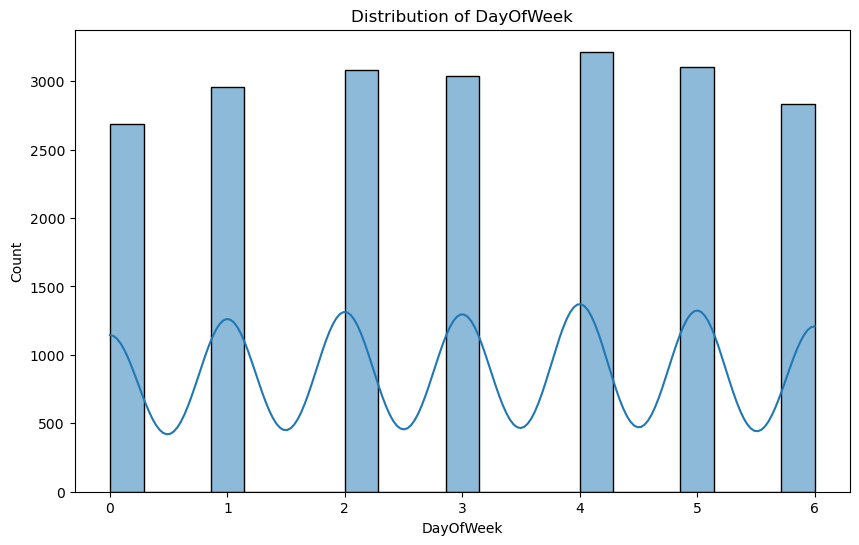

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of numeric features
features = ['Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Year', 'Latitude', 'Longitude', 'Month', 'Day', 'DayOfWeek']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


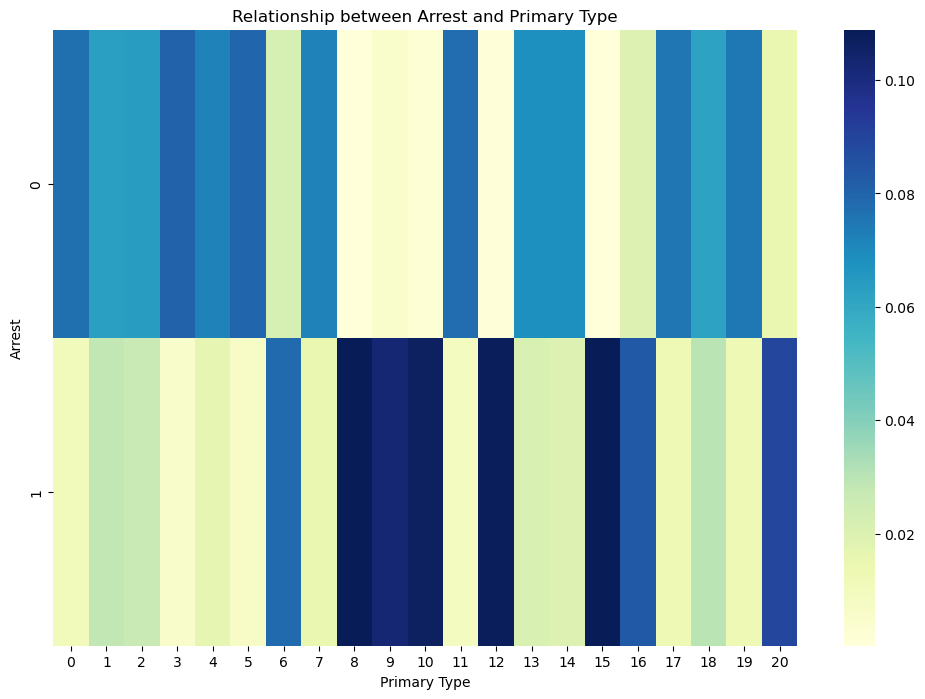

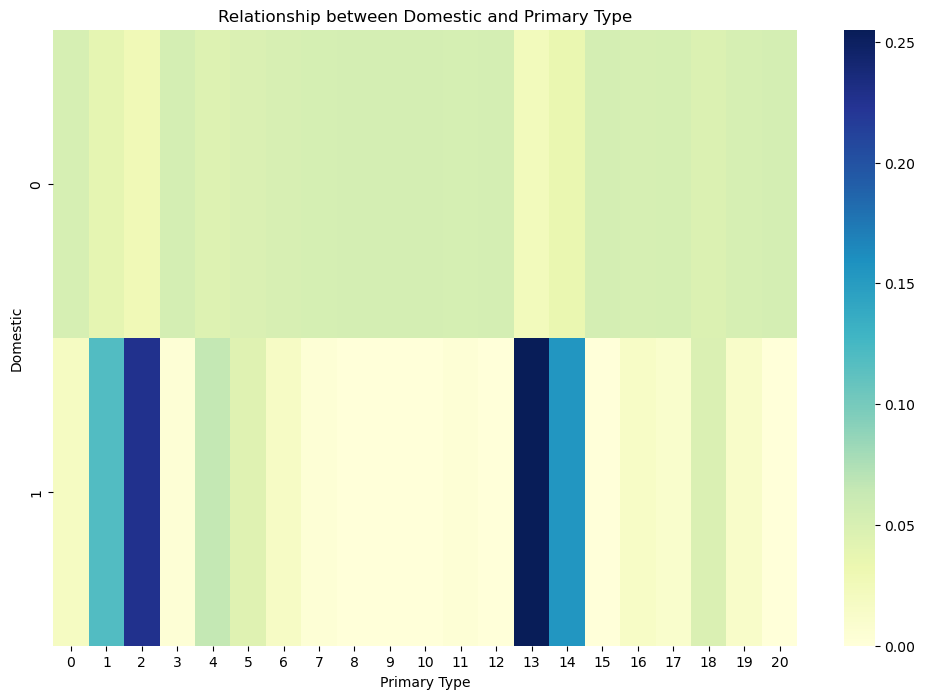

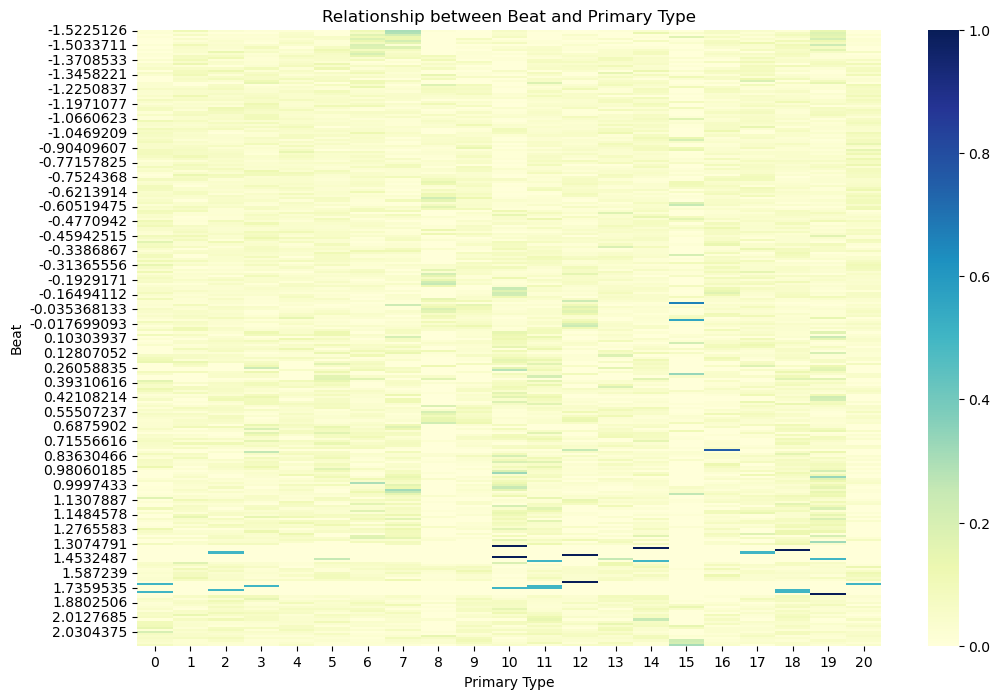

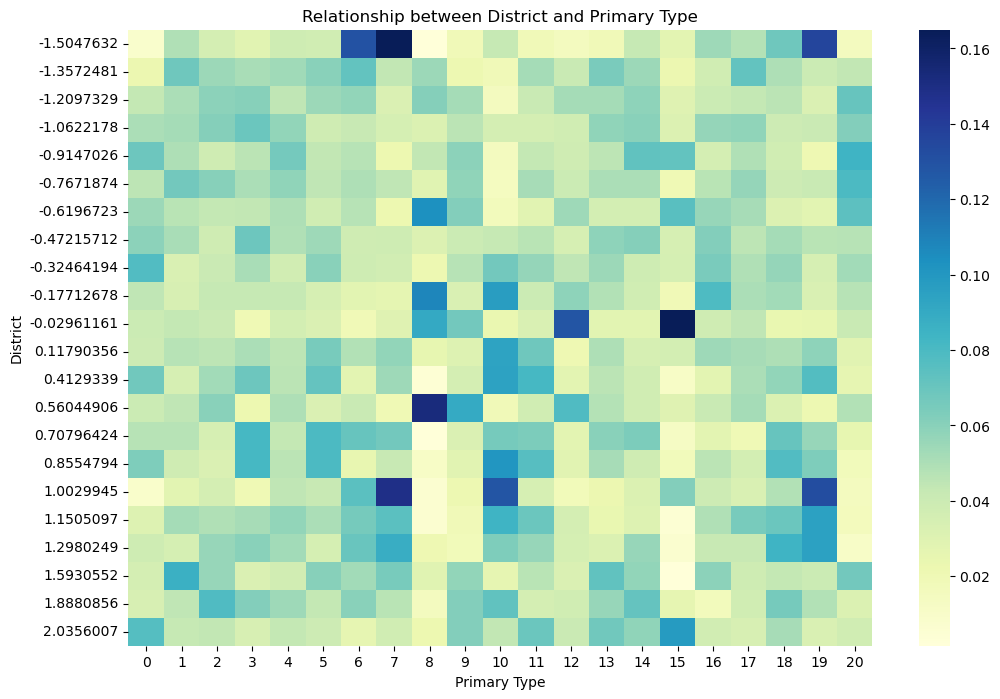

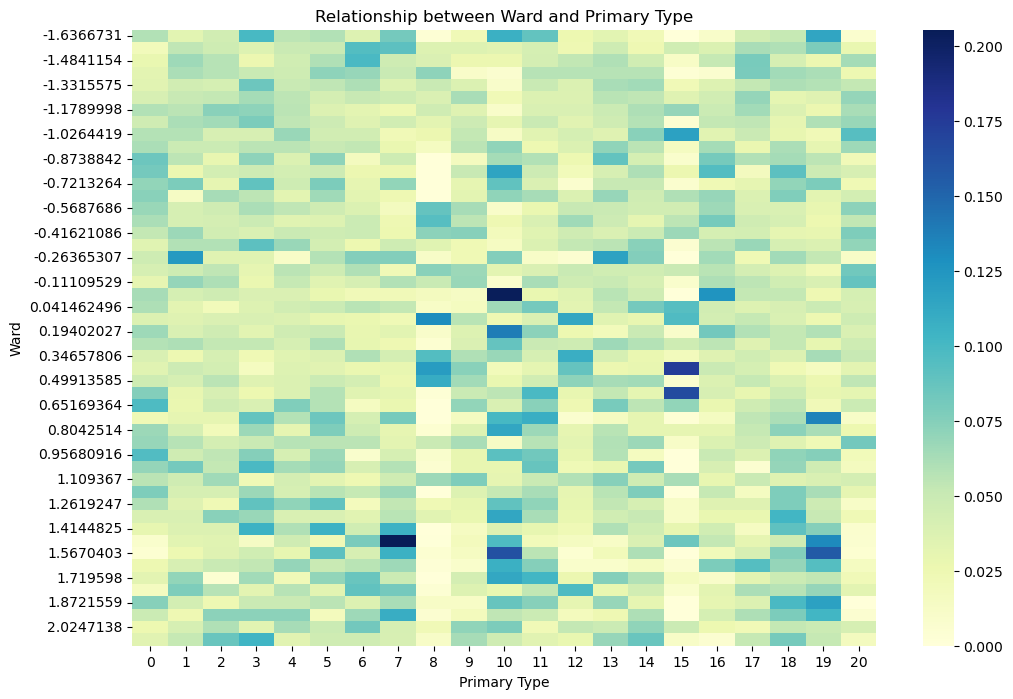

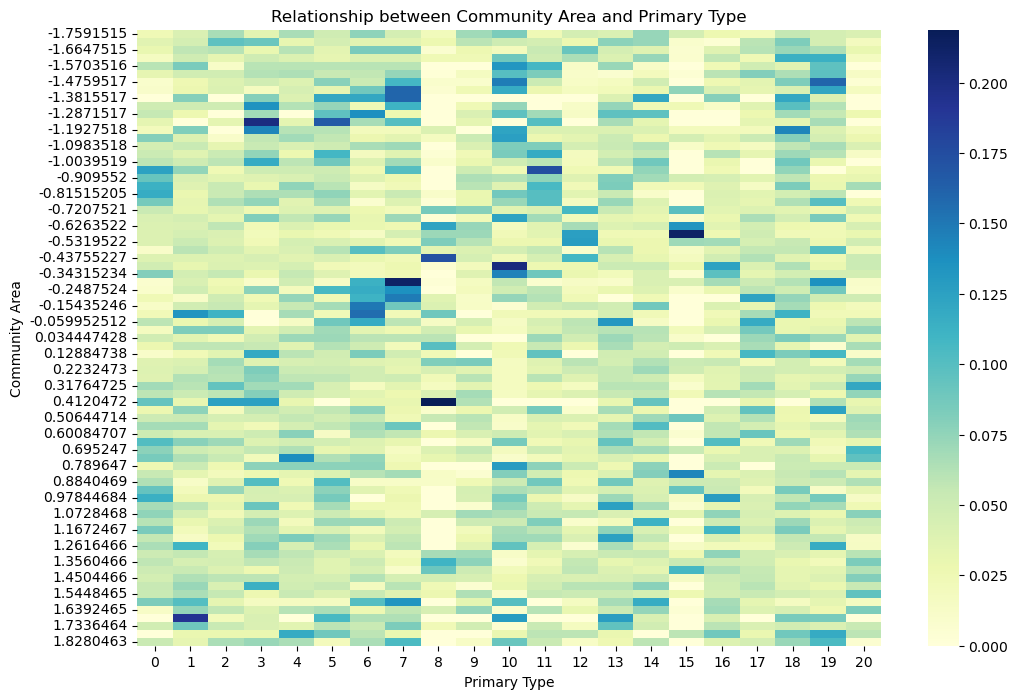

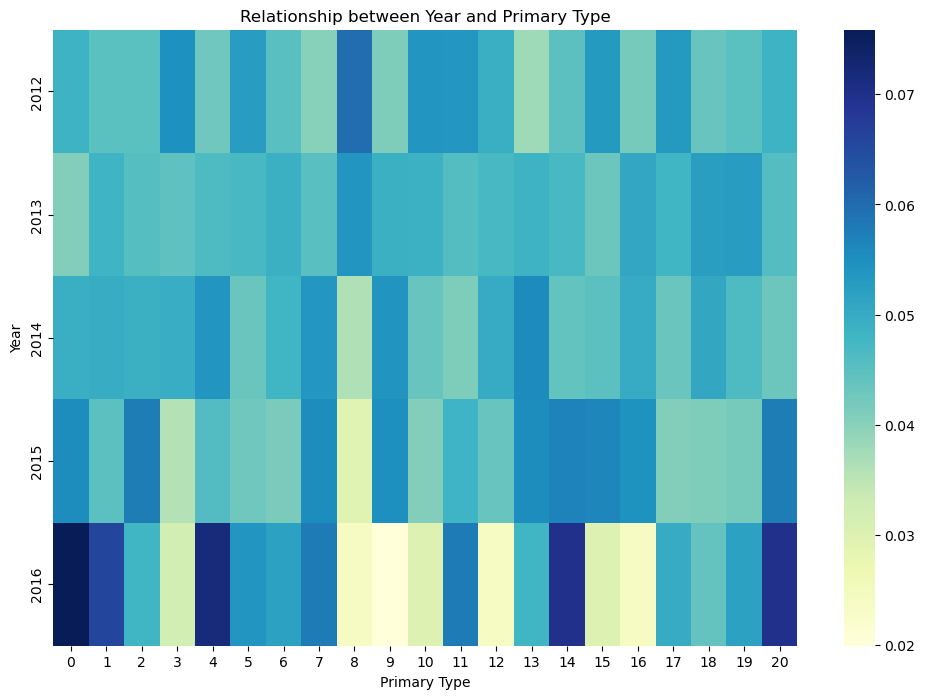

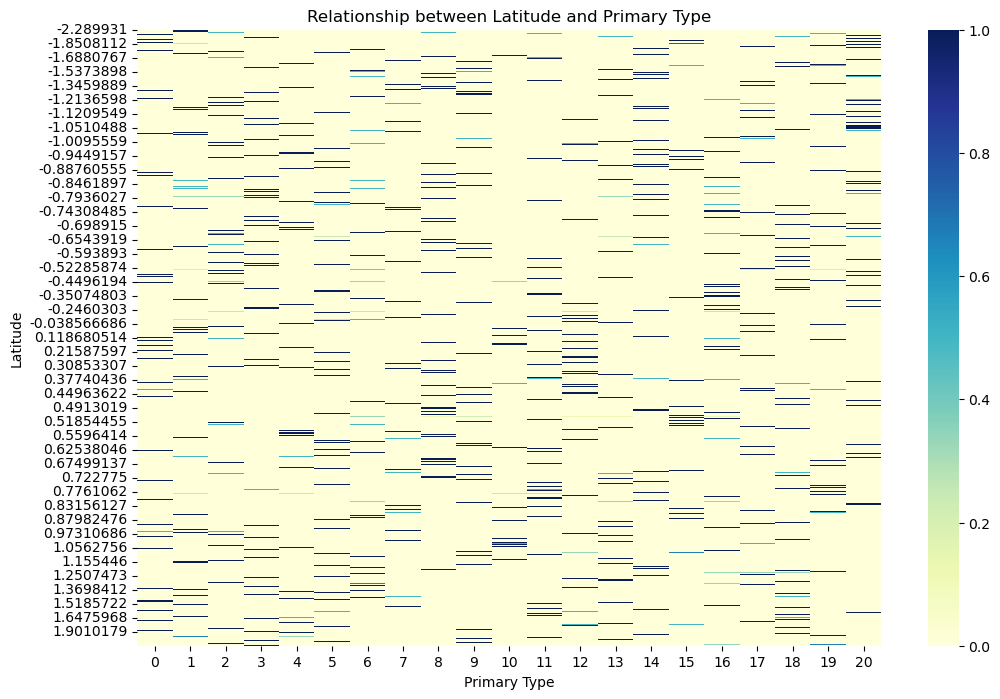

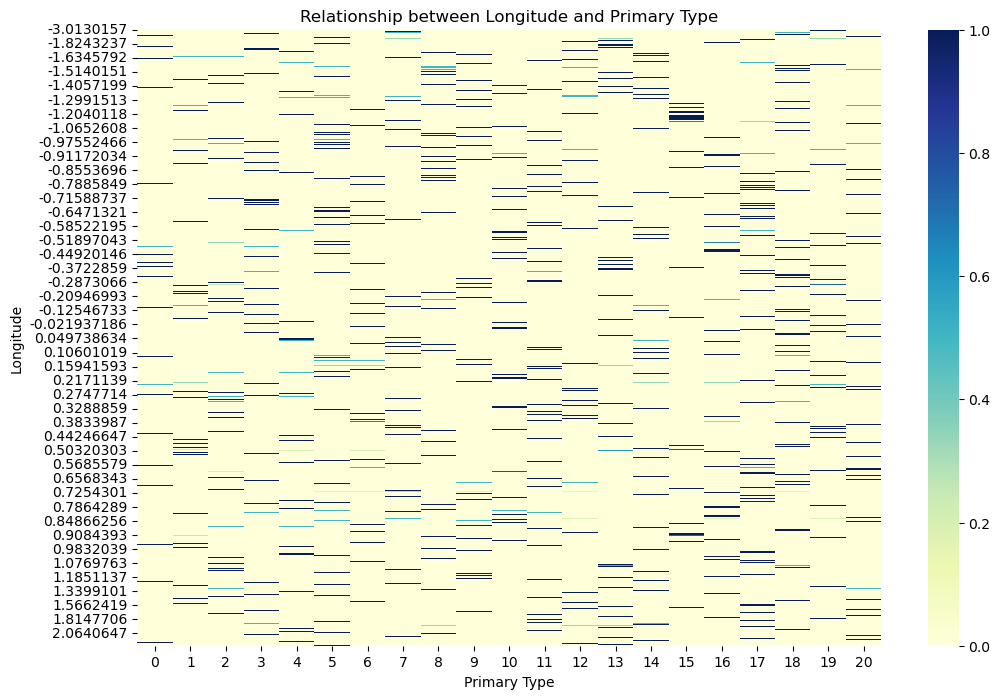

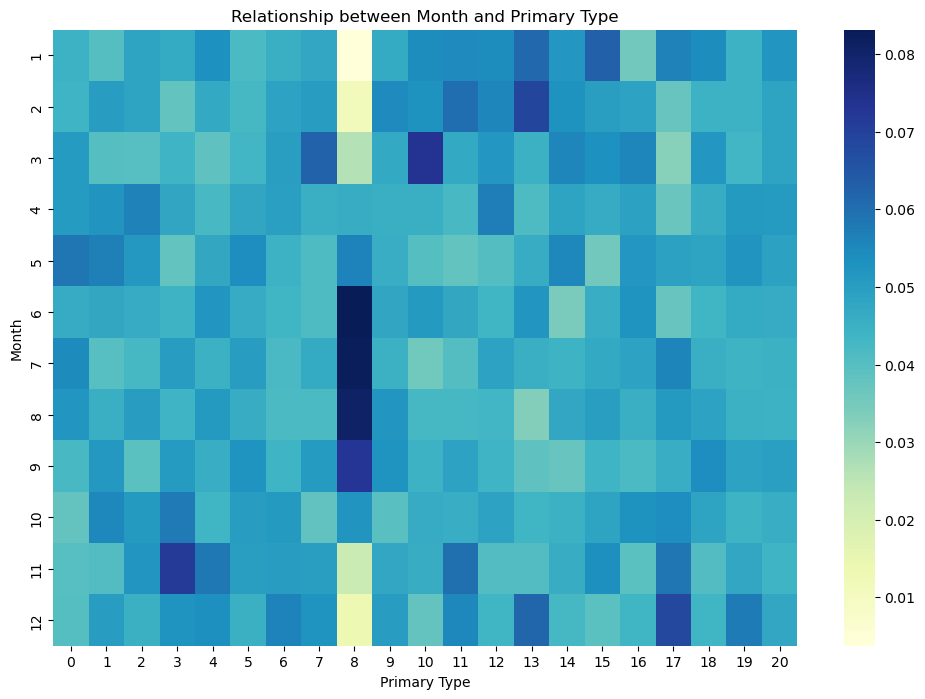

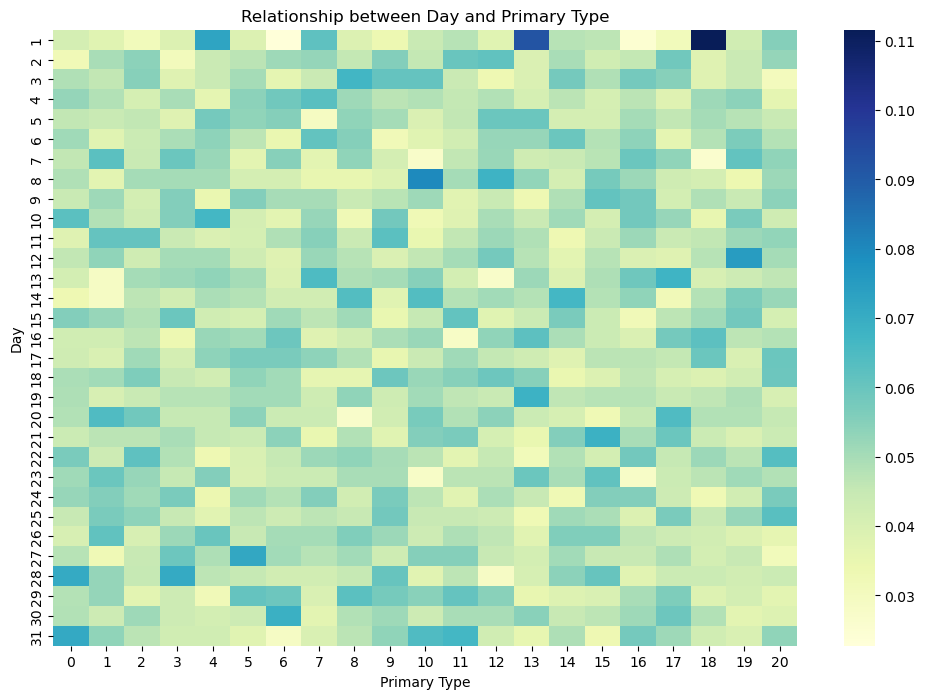

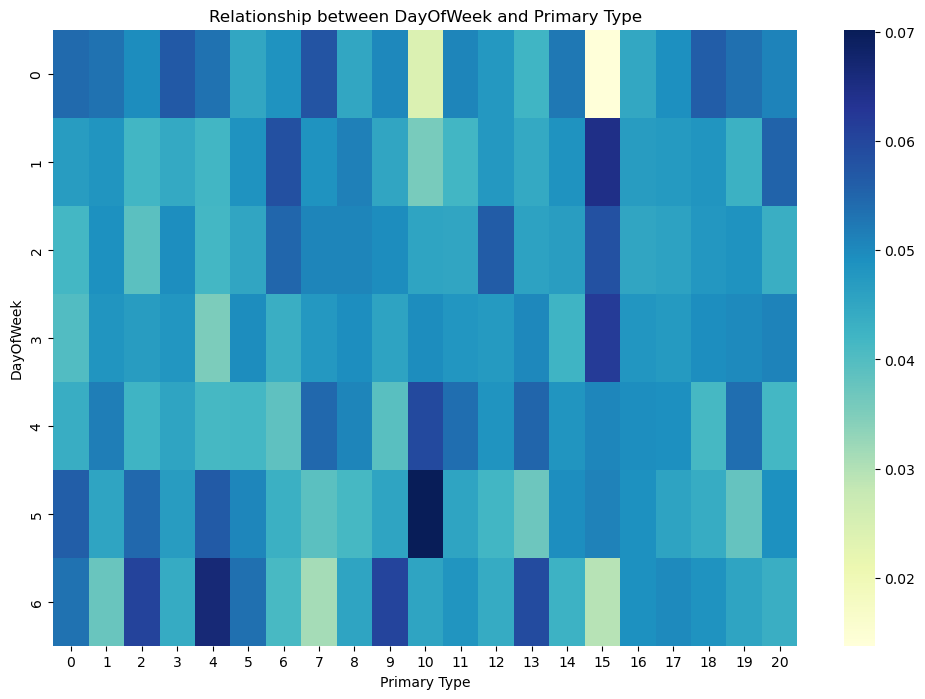

In [39]:
for feature in features:
    plt.figure(figsize=(12, 8))
    crosstab = pd.crosstab(index=df[feature], columns=df['Primary Type'], normalize='index')
    sns.heatmap(crosstab, cmap="YlGnBu", annot=False)
    plt.title(f'Relationship between {feature} and Primary Type')
    plt.show()


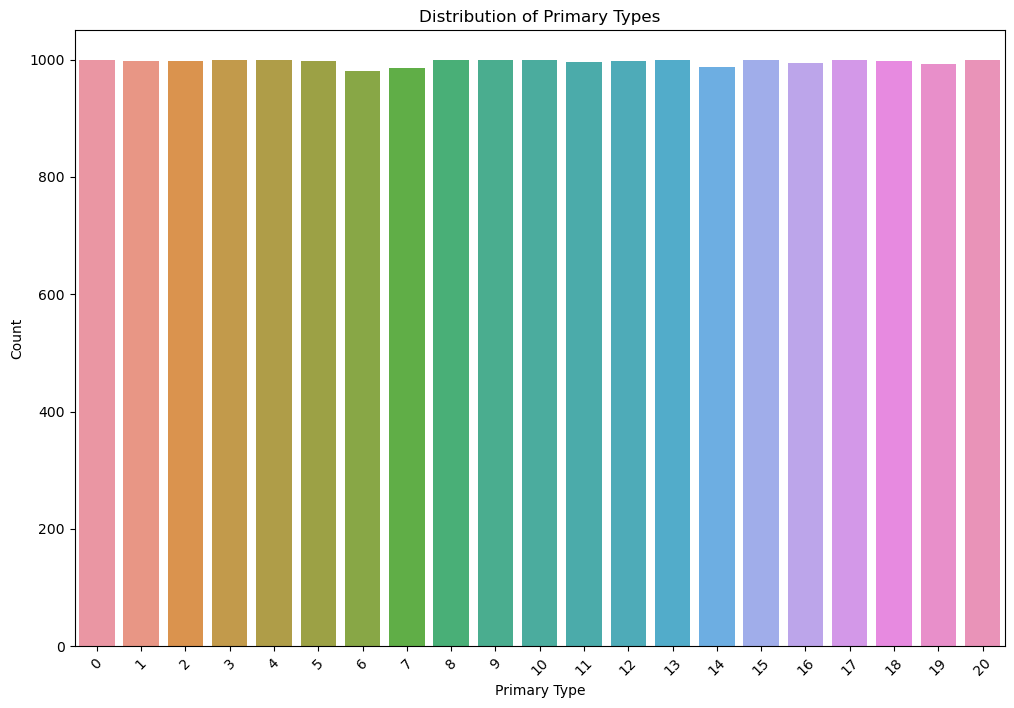

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data2' is your DataFrame
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Primary Type')
plt.title('Distribution of Primary Types')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many categories
plt.show()


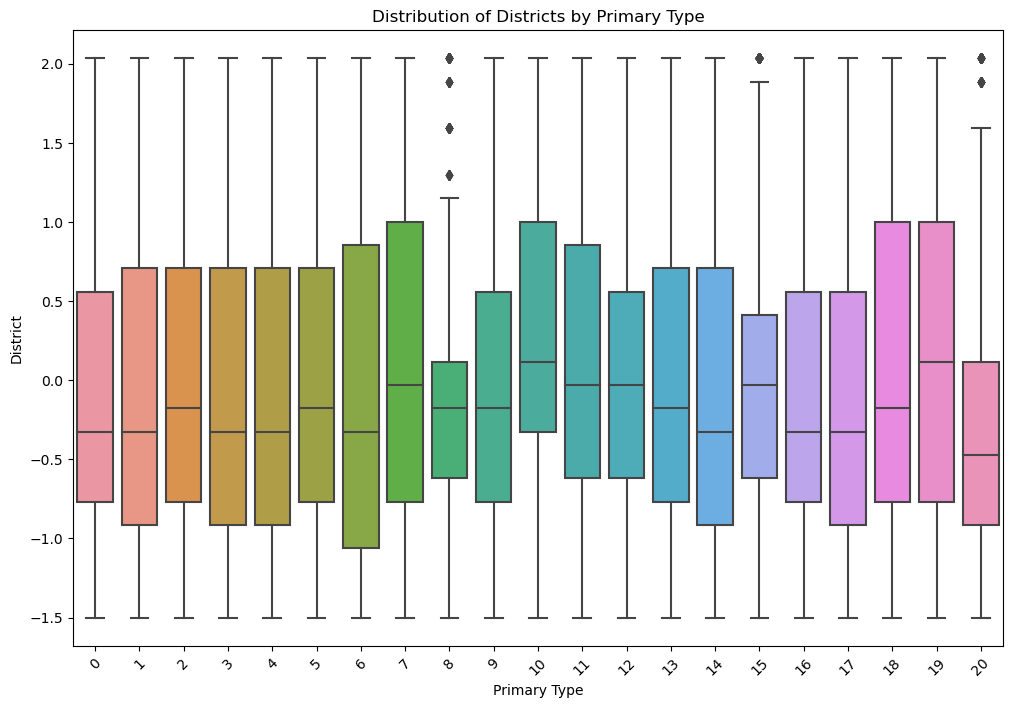

In [46]:
# Example: Primary Type vs. District
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Primary Type', y='District')
plt.title('Distribution of Districts by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('District')
plt.xticks(rotation=45)
plt.show()


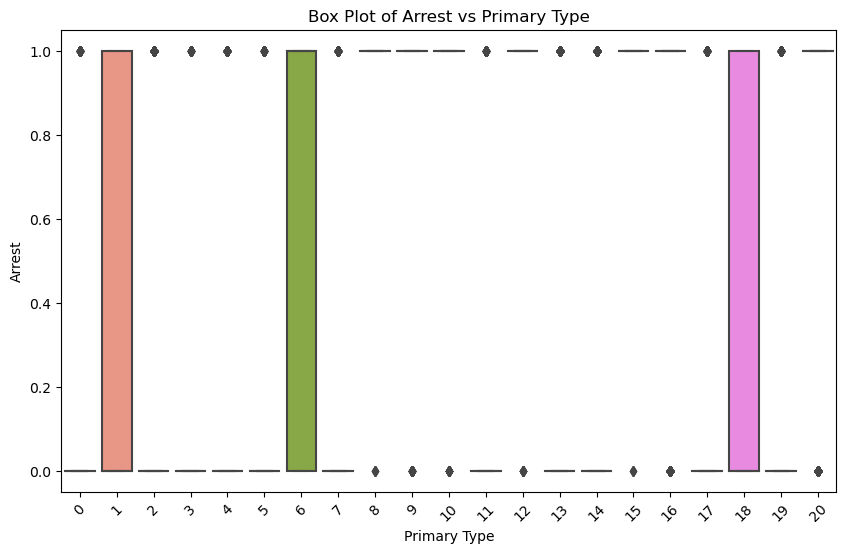

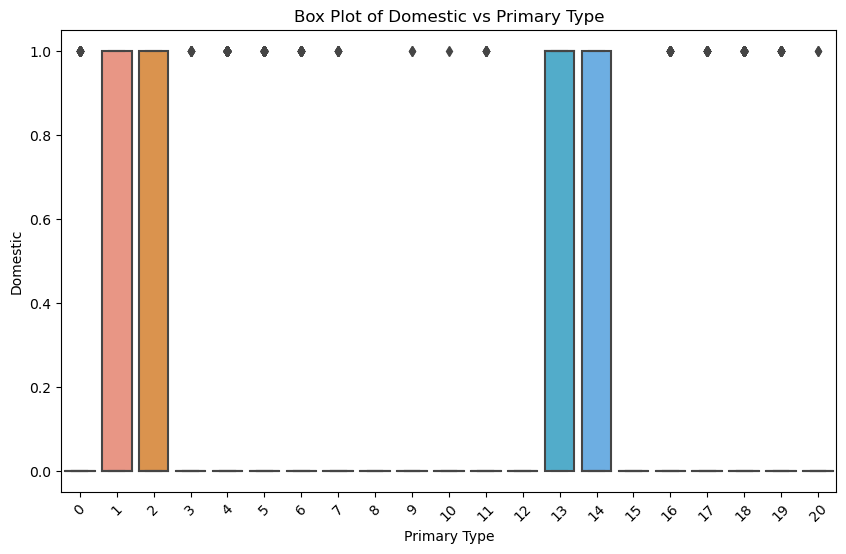

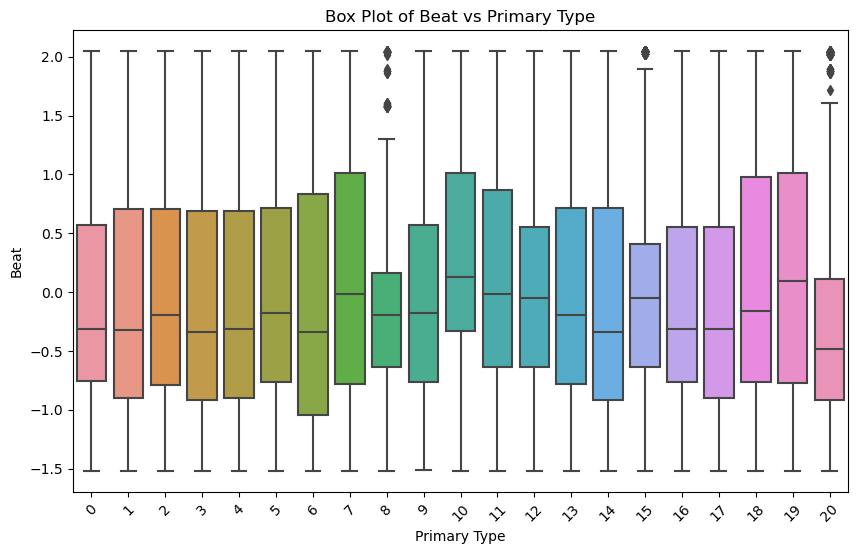

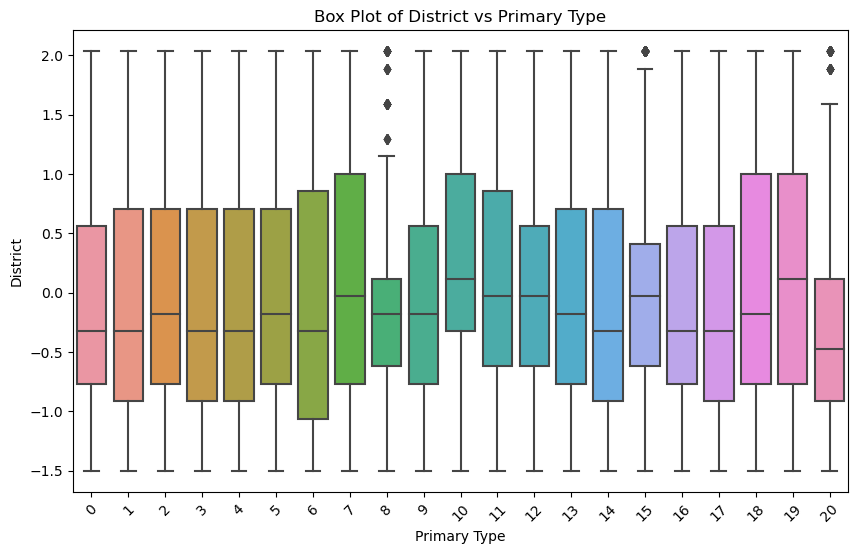

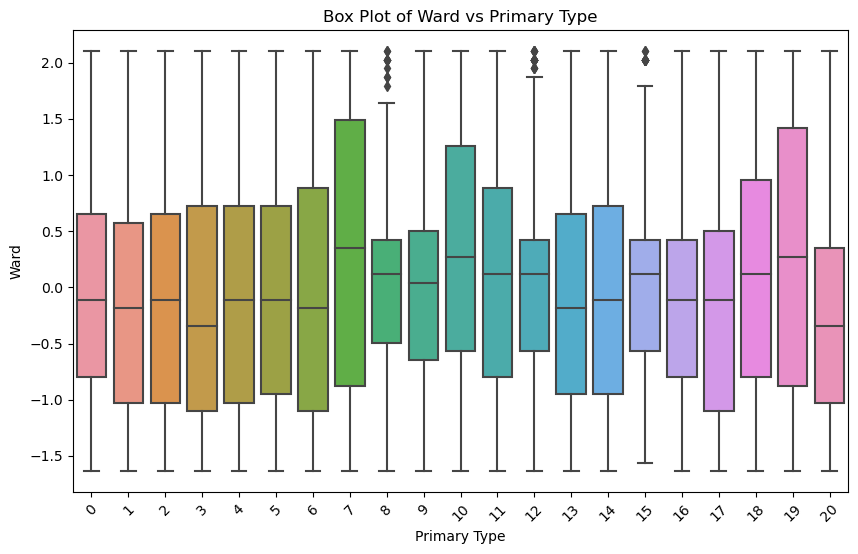

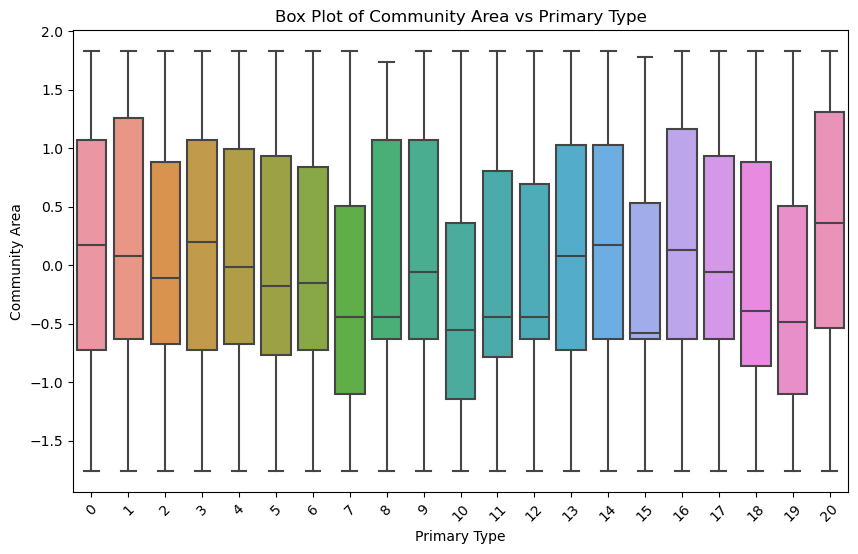

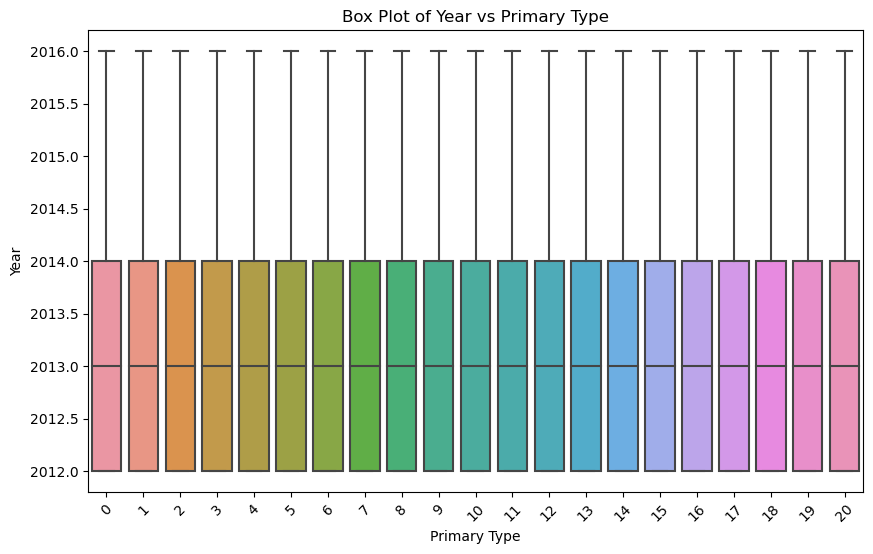

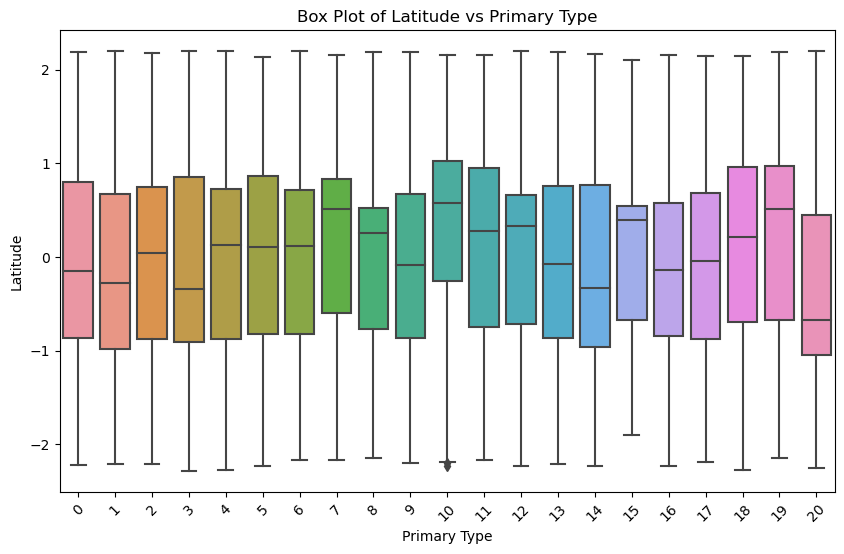

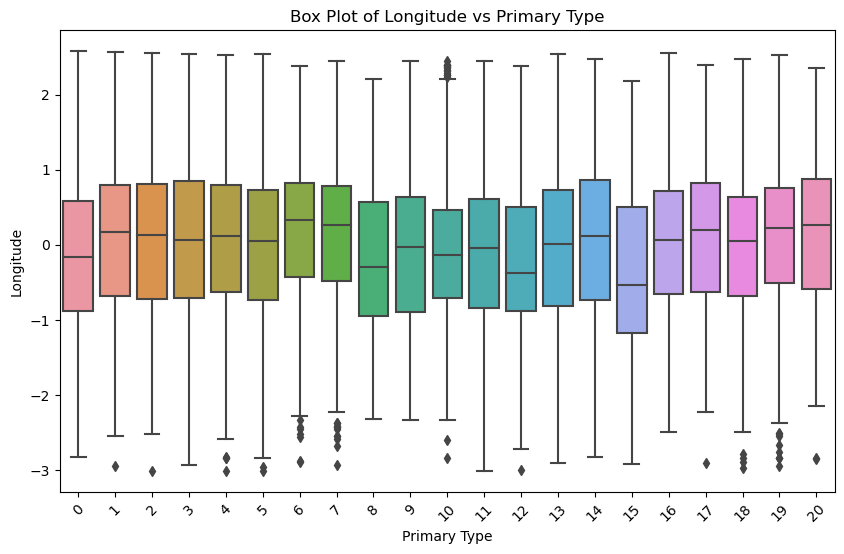

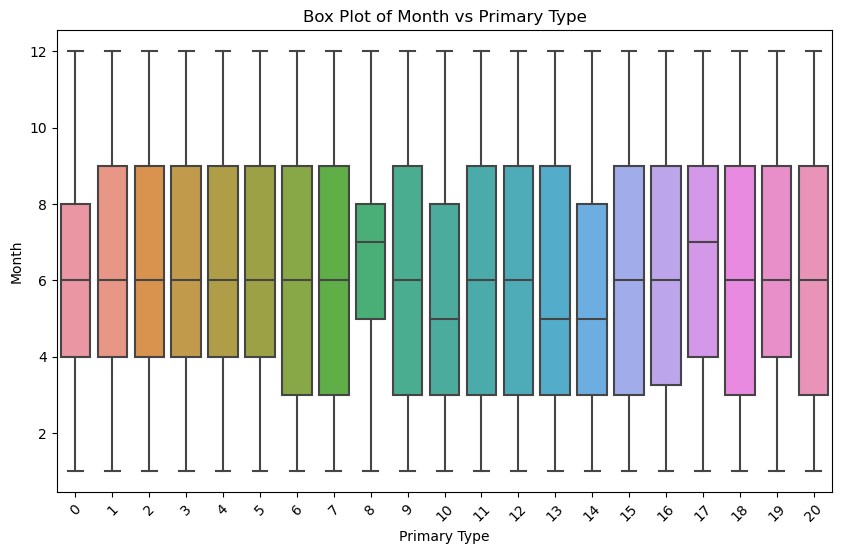

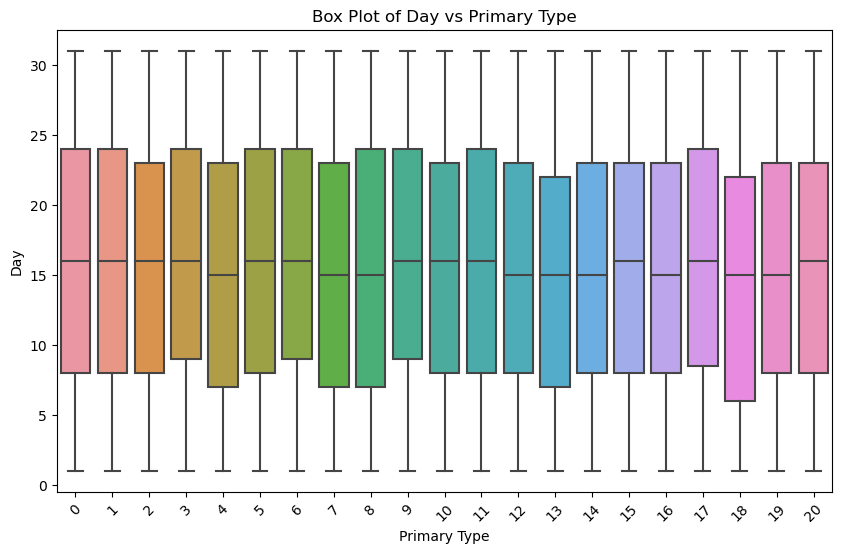

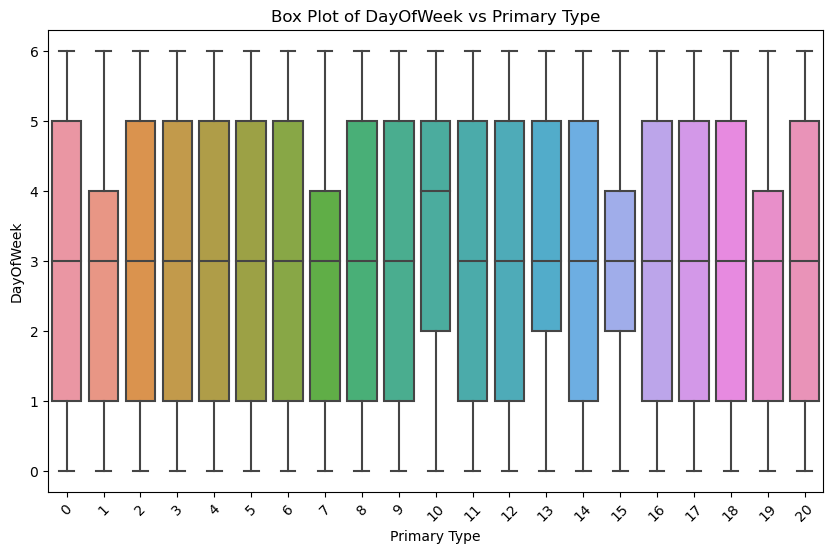

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features
features = ['Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
            'Year', 'Latitude', 'Longitude', 'Month', 'Day', 'DayOfWeek']

# Set the target variable
target = 'Primary Type'  # Replace with your actual target variable name if different

# Loop through each feature and create a box plot
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs {target}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()


In [48]:
for feature in features:
    median_values = df.groupby(target)[feature].median()
    print(f"Median of {feature} grouped by {target}:\n", median_values)
    print("\n")


Median of Arrest grouped by Primary Type:
 Primary Type
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    0.0
12    1.0
13    0.0
14    0.0
15    1.0
16    1.0
17    0.0
18    0.0
19    0.0
20    1.0
Name: Arrest, dtype: float64


Median of Domestic grouped by Primary Type:
 Primary Type
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
Name: Domestic, dtype: float64


Median of Beat grouped by Primary Type:
 Primary Type
0    -0.312183
1    -0.323962
2    -0.192917
3    -0.338687
4    -0.313656
5    -0.179665
6    -0.338687
7    -0.014754
8    -0.195862
9    -0.181138
10    0.131015
11   -0.019908
12   -0.048620
13   -0.197334
14   -0.341632
15   -0.047147
16   -0.312183
17   -0.313656
18   -0.163469
19    0.098622
20   -0.487401
Name: Beat, dtype: float64


Medi

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20921 entries, 0 to 20920
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Primary Type    20921 non-null  int64  
 1   Arrest          20921 non-null  int64  
 2   Domestic        20921 non-null  int64  
 3   Beat            20921 non-null  float64
 4   District        20921 non-null  float64
 5   Ward            20921 non-null  float64
 6   Community Area  20921 non-null  float64
 7   Year            20921 non-null  int64  
 8   Latitude        20921 non-null  float64
 9   Longitude       20921 non-null  float64
 10  Month           20921 non-null  int64  
 11  Day             20921 non-null  int64  
 12  DayOfWeek       20921 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


In [50]:
df.describe()

Primary Type        Arrest      Domestic          Beat      District  \
count  20921.000000  20921.000000  20921.000000  20921.000000  20921.000000   
mean       9.999092      0.437742      0.103293      0.000016      0.000017   
std        6.058364      0.496121      0.304349      1.000066      1.000066   
min        0.000000      0.000000      0.000000     -1.522513     -1.504763   
25%        5.000000      0.000000      0.000000     -0.771578     -0.767187   
50%       10.000000      0.000000      0.000000     -0.181138     -0.177127   
75%       15.000000      1.000000      0.000000      0.703787      0.707964   
max       20.000000      1.000000      1.000000      2.046634      2.035601   

               Ward  Community Area          Year      Latitude     Longitude  \
count  20921.000000    20921.000000  20921.000000  20921.000000  20921.000000   
mean       0.000105       -0.000033   2013.229100      0.000012      0.000013   
std        1.000004        1.000034      1.081191      1.000061      1.000066   
min       -1.636673       -1.759151   2012.000000     -2.289931     -3.013016   
25%       -0.873884       -0.673552   2012.000000     -0.829277     -0.776755   
50%       -0.034816       -0.295952   2013.000000      0.166762      0.069854   
75%        0.651694        0.931247   2014.000000      0.743762      0.741228   
max        2.100992        1.828046   2016.000000      2.198999      2.577880   

              Month           Day     DayOfWeek  
count  20921.000000  20921.000000  20921.000000  
mean       6.115195     15.579418      3.041967  
std        3.261283      8.894969      1.958059  
min        1.000000      1.000000      0.000000  
25%        3.000000      8.000000      1.000000  
50%        6.000000     16.000000      3.000000  
75%        9.000000     23.000000      5.000000  
max       12.000000     31.000000      6.000000

In [53]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
scaler = StandardScaler()
df[['Beat', 'District', 'Latitude', 'Longitude']] = scaler.fit_transform(df[['Beat', 'District', 'Latitude', 'Longitude']])


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Beat', 'District', 'Latitude', 'Longitude']] = scaler.fit_transform(df[['Beat', 'District', 'Latitude', 'Longitude']])


In [55]:
# For Latitude and Longitude
Q1 = df[['Latitude', 'Longitude']].quantile(0.25)
Q3 = df[['Latitude', 'Longitude']].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df = df[~((df[['Latitude', 'Longitude']] < (Q1 - 1.5 * IQR)) |(df[['Latitude', 'Longitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [57]:
from scipy import stats
import numpy as np 

df = df[(np.abs(stats.zscore(df[['Latitude', 'Longitude']])) < 3).all(axis=1)]


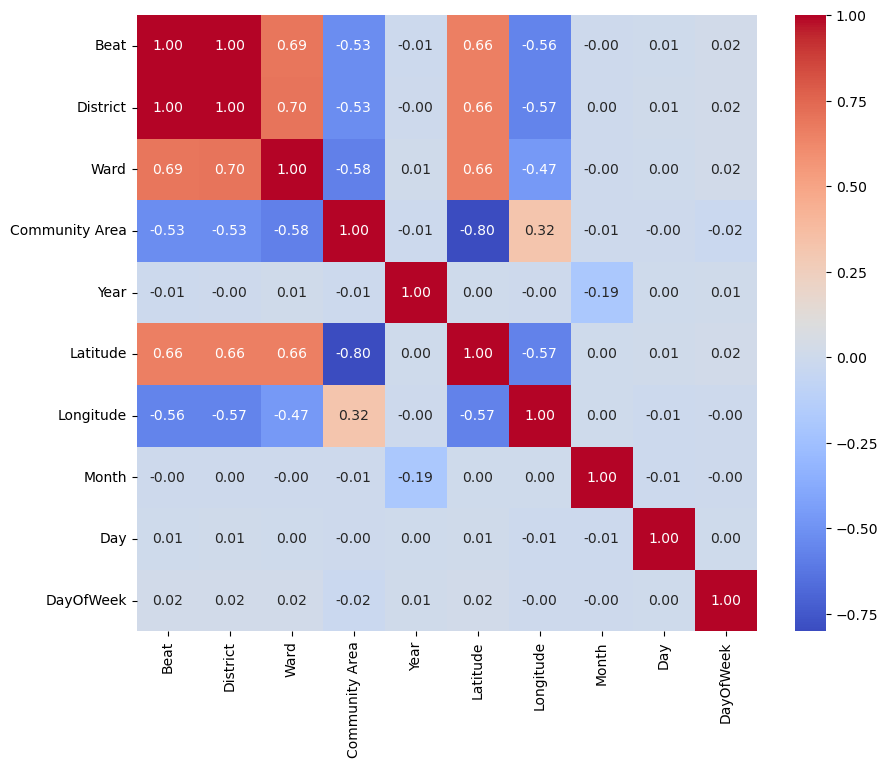

Highly correlated features (correlation > 0.8 or < -0.8):
[('Beat', 'District'), ('District', 'Beat'), ('Community Area', 'Latitude'), ('Latitude', 'Community Area')]


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical features
numerical_features = ['Beat', 'District', 'Ward', 'Community Area', 'Year', 'Latitude', 'Longitude', 'Month', 'Day', 'DayOfWeek']

# Correlation Matrix
corr_matrix = df[numerical_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Check for highly correlated features (correlation > 0.8 or < -0.8)
high_corr_features = [(feature1, feature2) for feature1 in corr_matrix.columns for feature2 in corr_matrix.columns 
                      if feature1 != feature2 and abs(corr_matrix.loc[feature1, feature2]) > 0.8]

print("Highly correlated features (correlation > 0.8 or < -0.8):")
print(high_corr_features)

# Dropping highly correlated features if necessary (example)
# df = df.drop(['Feature_to_drop'], axis=1)  # Replace 'Feature_to_drop' with the feature you want to drop based on correlation analysis


In [64]:
# Dropping one feature from each highly correlated pair
df = df.drop(['Beat', 'Community Area'], axis=1)

# Verifying the changes
print(df.columns)


Index(['Primary Type', 'Arrest', 'Domestic', 'District', 'Ward', 'Year',
       'Latitude', 'Longitude', 'Month', 'Day', 'DayOfWeek', 'Year_Binned',
       'Latitude_Binned', 'Longitude_Binned', 'Month_Day_Interaction'],
      dtype='object')


In [68]:
print(df.dtypes)



Primary Type               int64
Arrest                     int64
Domestic                   int64
District                 float64
Ward                     float64
Year                       int64
Latitude                 float64
Longitude                float64
Month                      int64
Day                        int64
DayOfWeek                  int64
Year_Binned              float64
Latitude_Binned          float64
Longitude_Binned         float64
Month_Day_Interaction    float64
dtype: object


In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('Primary Type', axis=1)
y = df['Primary Type']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization 
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature','Score']

print(feature_scores.nlargest(10, 'Score'))


             Feature        Score
0             Arrest  1422.081268
5           Latitude    27.178051
11   Latitude_Binned    26.180634
12  Longitude_Binned    17.083727
6          Longitude    16.474185
3               Ward    14.547835
2           District    14.029385
4               Year     8.713206
9          DayOfWeek     6.230679
7              Month     5.917559


C:\Users\SWETHAAMANI\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SWETHAAMANI\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [74]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming df is your DataFrame and 'Primary Type' is your target variable
X = df.drop('Primary Type', axis=1)
y = df['Primary Type']

# Feature selection
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Print top 10 features
print(feature_scores.nlargest(10, 'Score'))


             Feature        Score
0             Arrest  1422.081268
5           Latitude    27.178051
11   Latitude_Binned    26.180634
12  Longitude_Binned    17.083727
6          Longitude    16.474185
3               Ward    14.547835
2           District    14.029385
4               Year     8.713206
9          DayOfWeek     6.230679
7              Month     5.917559


C:\Users\SWETHAAMANI\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SWETHAAMANI\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Adjust number of components as needed
X_pca = pca.fit_transform(X_scaled)


In [52]:
# Load your dataset
df.to_csv('final_crime.csv')